### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(['EIN','SPECIAL_CONSIDERATIONS','STATUS'], axis=1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                19568
APPLICATION_TYPE       17
AFFILIATION             6
CLASSIFICATION         71
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts=application_df["APPLICATION_TYPE"].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

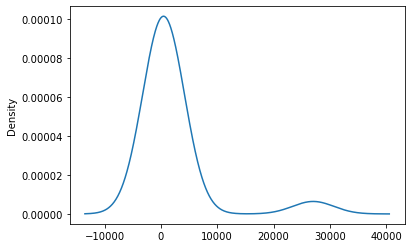

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application=list(app_counts[app_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts=application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

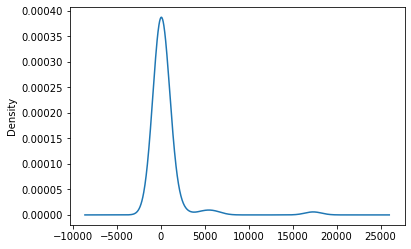

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class=list(class_counts[class_counts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                19568
APPLICATION_TYPE        9
AFFILIATION             6
CLASSIFICATION          6
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
name_counts=application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

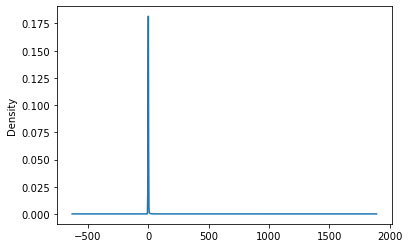

In [12]:
# Visualize the value counts of CLASSIFICATION
name_counts.plot.density()

In [13]:
# Determine which values to replace if counts are less than ..?
name_class=list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for cls in name_class:
    application_df['NAME'] = application_df['NAME'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [14]:
# Generate our categorical variable lists
application_cat= application_df.dtypes[application_df.dtypes=='object'].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df=pd.DataFrame(enc.fit_transform(application_df[application_cat]))
encode_df

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df= application_df.merge(encode_df, left_index=True, right_index=True)
application_df=application_df.drop(application_cat,1)
application_df

C:\Users\Public\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y=application_df["IS_SUCCESSFUL"].values
X=application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\Public\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 3*number_input_features
hidden_nodes_layer2 = 2*number_input_features
hidden_nodes_layer3 = number_input_features

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third Hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1185)              469260    
                                                                 
 dense_1 (Dense)             (None, 790)               936940    
                                                                 
 dense_2 (Dense)             (None, 395)               312445    
                                                                 
 dense_3 (Dense)             (None, 1)                 396       
                                                                 
Total params: 1,719,041
Trainable params: 1,719,041
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Import checkpoint Dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint path and filenmaes
os.makedirs("checkpoints/",exist_ok= True)
checkpoint_path="checkpoints/weights.{epoch:02d}.hdf5"

In [22]:
# Create a callback that saves the model's weights every epoch
cp_callback=ModelCheckpoint(
filepath=checkpoint_path,
verbose=1,
save_weights_only=True,
save_freq=5)

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50, callbacks=[cp_callback])

Epoch 1/50
  1/804 [..............................] - ETA: 5:33 - loss: 0.7119 - accuracy: 0.5312
Epoch 1: saving model to checkpoints\weights.01.hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.8928 - accuracy: 0.4500 
Epoch 1: saving model to checkpoints\weights.01.hdf5
 10/804 [..............................] - ETA: 10s - loss: 0.8405 - accuracy: 0.5063
Epoch 1: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 9s - loss: 0.7810 - accuracy: 0.5667 
Epoch 1: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 9s - loss: 0.7526 - accuracy: 0.5906
Epoch 1: saving model to checkpoints\weights.01.hdf5
 25/804 [..............................] - ETA: 9s - loss: 0.7184 - accuracy: 0.6225
Epoch 1: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 9s - loss: 0.6949 - accuracy: 0.6365
Epoch 1: saving model to checkpoints\weights.01.hdf5
 35/804 [>.......

295/804 [==========>...................] - ETA: 5s - loss: 0.5072 - accuracy: 0.7555
Epoch 1: saving model to checkpoints\weights.01.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.5072 - accuracy: 0.7557
Epoch 1: saving model to checkpoints\weights.01.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.5070 - accuracy: 0.7555
Epoch 1: saving model to checkpoints\weights.01.hdf5
310/804 [==========>...................] - ETA: 5s - loss: 0.5054 - accuracy: 0.7565
Epoch 1: saving model to checkpoints\weights.01.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.5051 - accuracy: 0.7568
Epoch 1: saving model to checkpoints\weights.01.hdf5
320/804 [==========>...................] - ETA: 5s - loss: 0.5037 - accuracy: 0.7571
Epoch 1: saving model to checkpoints\weights.01.hdf5
325/804 [===========>..................] - ETA: 5s - loss: 0.5038 - accuracy: 0.7568
Epoch 1: saving model to checkpoints\weights.01.hdf5
330/804 [===========>.............

590/804 [=====================>........] - ETA: 2s - loss: 0.4792 - accuracy: 0.7740
Epoch 1: saving model to checkpoints\weights.01.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.4787 - accuracy: 0.7743
Epoch 1: saving model to checkpoints\weights.01.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.4778 - accuracy: 0.7746
Epoch 1: saving model to checkpoints\weights.01.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.4778 - accuracy: 0.7748
Epoch 1: saving model to checkpoints\weights.01.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.4772 - accuracy: 0.7757
Epoch 1: saving model to checkpoints\weights.01.hdf5
615/804 [=====================>........] - ETA: 2s - loss: 0.4761 - accuracy: 0.7763
Epoch 1: saving model to checkpoints\weights.01.hdf5
620/804 [======================>.......] - ETA: 2s - loss: 0.4759 - accuracy: 0.7763
Epoch 1: saving model to checkpoints\weights.01.hdf5
625/804 [======================>..

 81/804 [==>...........................] - ETA: 7s - loss: 0.4301 - accuracy: 0.8002
Epoch 2: saving model to checkpoints\weights.02.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 0.4298 - accuracy: 0.7998
Epoch 2: saving model to checkpoints\weights.02.hdf5
 91/804 [==>...........................] - ETA: 7s - loss: 0.4266 - accuracy: 0.8019
Epoch 2: saving model to checkpoints\weights.02.hdf5
 96/804 [==>...........................] - ETA: 7s - loss: 0.4277 - accuracy: 0.8001
Epoch 2: saving model to checkpoints\weights.02.hdf5
101/804 [==>...........................] - ETA: 7s - loss: 0.4285 - accuracy: 0.7992
Epoch 2: saving model to checkpoints\weights.02.hdf5
106/804 [==>...........................] - ETA: 7s - loss: 0.4268 - accuracy: 0.7992
Epoch 2: saving model to checkpoints\weights.02.hdf5
111/804 [===>..........................] - ETA: 7s - loss: 0.4256 - accuracy: 0.8010
Epoch 2: saving model to checkpoints\weights.02.hdf5
116/804 [===>.....................

376/804 [=============>................] - ETA: 4s - loss: 0.4364 - accuracy: 0.7936
Epoch 2: saving model to checkpoints\weights.02.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.4364 - accuracy: 0.7940
Epoch 2: saving model to checkpoints\weights.02.hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.4364 - accuracy: 0.7937
Epoch 2: saving model to checkpoints\weights.02.hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.4357 - accuracy: 0.7943
Epoch 2: saving model to checkpoints\weights.02.hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.4352 - accuracy: 0.7947
Epoch 2: saving model to checkpoints\weights.02.hdf5
401/804 [=============>................] - ETA: 4s - loss: 0.4353 - accuracy: 0.7945
Epoch 2: saving model to checkpoints\weights.02.hdf5
406/804 [==============>...............] - ETA: 4s - loss: 0.4353 - accuracy: 0.7950
Epoch 2: saving model to checkpoints\weights.02.hdf5
411/804 [==============>..........

671/804 [========================>.....] - ETA: 1s - loss: 0.4359 - accuracy: 0.7948
Epoch 2: saving model to checkpoints\weights.02.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.4363 - accuracy: 0.7945
Epoch 2: saving model to checkpoints\weights.02.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.4363 - accuracy: 0.7944
Epoch 2: saving model to checkpoints\weights.02.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.4359 - accuracy: 0.7946
Epoch 2: saving model to checkpoints\weights.02.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.4361 - accuracy: 0.7944
Epoch 2: saving model to checkpoints\weights.02.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.4360 - accuracy: 0.7944
Epoch 2: saving model to checkpoints\weights.02.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.4361 - accuracy: 0.7940
Epoch 2: saving model to checkpoints\weights.02.hdf5
706/804 [=========================

166/804 [=====>........................] - ETA: 6s - loss: 0.4235 - accuracy: 0.7993
Epoch 3: saving model to checkpoints\weights.03.hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.4249 - accuracy: 0.7984
Epoch 3: saving model to checkpoints\weights.03.hdf5
176/804 [=====>........................] - ETA: 6s - loss: 0.4243 - accuracy: 0.7981
Epoch 3: saving model to checkpoints\weights.03.hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.4247 - accuracy: 0.7973
Epoch 3: saving model to checkpoints\weights.03.hdf5
186/804 [=====>........................] - ETA: 6s - loss: 0.4242 - accuracy: 0.7969
Epoch 3: saving model to checkpoints\weights.03.hdf5
191/804 [======>.......................] - ETA: 6s - loss: 0.4252 - accuracy: 0.7966
Epoch 3: saving model to checkpoints\weights.03.hdf5
196/804 [======>.......................] - ETA: 6s - loss: 0.4257 - accuracy: 0.7964
Epoch 3: saving model to checkpoints\weights.03.hdf5
201/804 [======>..................

460/804 [================>.............] - ETA: 3s - loss: 0.4280 - accuracy: 0.7968
Epoch 3: saving model to checkpoints\weights.03.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.4278 - accuracy: 0.7971
Epoch 3: saving model to checkpoints\weights.03.hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.4274 - accuracy: 0.7973
Epoch 3: saving model to checkpoints\weights.03.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.4279 - accuracy: 0.7966
Epoch 3: saving model to checkpoints\weights.03.hdf5
480/804 [================>.............] - ETA: 3s - loss: 0.4277 - accuracy: 0.7966
Epoch 3: saving model to checkpoints\weights.03.hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.4277 - accuracy: 0.7968
Epoch 3: saving model to checkpoints\weights.03.hdf5
490/804 [=================>............] - ETA: 3s - loss: 0.4285 - accuracy: 0.7961
Epoch 3: saving model to checkpoints\weights.03.hdf5
495/804 [=================>.......

754/804 [===========================>..] - ETA: 0s - loss: 0.4286 - accuracy: 0.7941
Epoch 3: saving model to checkpoints\weights.03.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.4290 - accuracy: 0.7938
Epoch 3: saving model to checkpoints\weights.03.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.4289 - accuracy: 0.7939
Epoch 3: saving model to checkpoints\weights.03.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.4290 - accuracy: 0.7939
Epoch 3: saving model to checkpoints\weights.03.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.4289 - accuracy: 0.7939
Epoch 3: saving model to checkpoints\weights.03.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.4290 - accuracy: 0.7940
Epoch 3: saving model to checkpoints\weights.03.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4288 - accuracy: 0.7941
Epoch 3: saving model to checkpoints\weights.03.hdf5
788/804 [=========================

243/804 [========>.....................] - ETA: 6s - loss: 0.4327 - accuracy: 0.7932
Epoch 4: saving model to checkpoints\weights.04.hdf5
248/804 [========>.....................] - ETA: 6s - loss: 0.4330 - accuracy: 0.7926
Epoch 4: saving model to checkpoints\weights.04.hdf5
253/804 [========>.....................] - ETA: 6s - loss: 0.4339 - accuracy: 0.7911
Epoch 4: saving model to checkpoints\weights.04.hdf5
258/804 [========>.....................] - ETA: 6s - loss: 0.4327 - accuracy: 0.7922
Epoch 4: saving model to checkpoints\weights.04.hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.4320 - accuracy: 0.7924
Epoch 4: saving model to checkpoints\weights.04.hdf5
268/804 [=========>....................] - ETA: 5s - loss: 0.4317 - accuracy: 0.7927
Epoch 4: saving model to checkpoints\weights.04.hdf5
273/804 [=========>....................] - ETA: 5s - loss: 0.4314 - accuracy: 0.7929
Epoch 4: saving model to checkpoints\weights.04.hdf5
278/804 [=========>...............

538/804 [===================>..........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7921
Epoch 4: saving model to checkpoints\weights.04.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7918
Epoch 4: saving model to checkpoints\weights.04.hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.4329 - accuracy: 0.7915
Epoch 4: saving model to checkpoints\weights.04.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.4326 - accuracy: 0.7916
Epoch 4: saving model to checkpoints\weights.04.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.4327 - accuracy: 0.7918
Epoch 4: saving model to checkpoints\weights.04.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7923
Epoch 4: saving model to checkpoints\weights.04.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.4323 - accuracy: 0.7923
Epoch 4: saving model to checkpoints\weights.04.hdf5
573/804 [====================>....

 29/804 [>.............................] - ETA: 9s - loss: 0.4203 - accuracy: 0.7909
Epoch 5: saving model to checkpoints\weights.05.hdf5
 34/804 [>.............................] - ETA: 9s - loss: 0.4222 - accuracy: 0.7895
Epoch 5: saving model to checkpoints\weights.05.hdf5
 39/804 [>.............................] - ETA: 9s - loss: 0.4233 - accuracy: 0.7893
Epoch 5: saving model to checkpoints\weights.05.hdf5
 44/804 [>.............................] - ETA: 9s - loss: 0.4204 - accuracy: 0.7940
Epoch 5: saving model to checkpoints\weights.05.hdf5
 49/804 [>.............................] - ETA: 8s - loss: 0.4178 - accuracy: 0.7953
Epoch 5: saving model to checkpoints\weights.05.hdf5
 54/804 [=>............................] - ETA: 8s - loss: 0.4126 - accuracy: 0.7998
Epoch 5: saving model to checkpoints\weights.05.hdf5
 59/804 [=>............................] - ETA: 8s - loss: 0.4138 - accuracy: 0.8024
Epoch 5: saving model to checkpoints\weights.05.hdf5
 64/804 [=>.......................

324/804 [===========>..................] - ETA: 5s - loss: 0.4237 - accuracy: 0.7992
Epoch 5: saving model to checkpoints\weights.05.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7987
Epoch 5: saving model to checkpoints\weights.05.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 0.4254 - accuracy: 0.7987
Epoch 5: saving model to checkpoints\weights.05.hdf5
339/804 [===========>..................] - ETA: 5s - loss: 0.4266 - accuracy: 0.7972
Epoch 5: saving model to checkpoints\weights.05.hdf5
344/804 [===========>..................] - ETA: 5s - loss: 0.4271 - accuracy: 0.7969
Epoch 5: saving model to checkpoints\weights.05.hdf5
349/804 [============>.................] - ETA: 5s - loss: 0.4270 - accuracy: 0.7968
Epoch 5: saving model to checkpoints\weights.05.hdf5
354/804 [============>.................] - ETA: 5s - loss: 0.4267 - accuracy: 0.7971
Epoch 5: saving model to checkpoints\weights.05.hdf5
359/804 [============>............

619/804 [======================>.......] - ETA: 2s - loss: 0.4263 - accuracy: 0.7972
Epoch 5: saving model to checkpoints\weights.05.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.4263 - accuracy: 0.7970
Epoch 5: saving model to checkpoints\weights.05.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.4260 - accuracy: 0.7970
Epoch 5: saving model to checkpoints\weights.05.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.4261 - accuracy: 0.7972
Epoch 5: saving model to checkpoints\weights.05.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.4257 - accuracy: 0.7974
Epoch 5: saving model to checkpoints\weights.05.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.4256 - accuracy: 0.7978
Epoch 5: saving model to checkpoints\weights.05.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.4254 - accuracy: 0.7980
Epoch 5: saving model to checkpoints\weights.05.hdf5
654/804 [=======================>.

110/804 [===>..........................] - ETA: 7s - loss: 0.4254 - accuracy: 0.7866
Epoch 6: saving model to checkpoints\weights.06.hdf5
115/804 [===>..........................] - ETA: 7s - loss: 0.4273 - accuracy: 0.7845
Epoch 6: saving model to checkpoints\weights.06.hdf5
120/804 [===>..........................] - ETA: 7s - loss: 0.4273 - accuracy: 0.7862
Epoch 6: saving model to checkpoints\weights.06.hdf5
125/804 [===>..........................] - ETA: 7s - loss: 0.4252 - accuracy: 0.7880
Epoch 6: saving model to checkpoints\weights.06.hdf5
130/804 [===>..........................] - ETA: 7s - loss: 0.4248 - accuracy: 0.7889
Epoch 6: saving model to checkpoints\weights.06.hdf5
135/804 [====>.........................] - ETA: 7s - loss: 0.4249 - accuracy: 0.7900
Epoch 6: saving model to checkpoints\weights.06.hdf5
140/804 [====>.........................] - ETA: 7s - loss: 0.4259 - accuracy: 0.7900
Epoch 6: saving model to checkpoints\weights.06.hdf5
145/804 [====>....................

405/804 [==============>...............] - ETA: 4s - loss: 0.4267 - accuracy: 0.7948
Epoch 6: saving model to checkpoints\weights.06.hdf5
410/804 [==============>...............] - ETA: 4s - loss: 0.4271 - accuracy: 0.7947
Epoch 6: saving model to checkpoints\weights.06.hdf5
415/804 [==============>...............] - ETA: 4s - loss: 0.4273 - accuracy: 0.7950
Epoch 6: saving model to checkpoints\weights.06.hdf5
420/804 [==============>...............] - ETA: 4s - loss: 0.4274 - accuracy: 0.7944
Epoch 6: saving model to checkpoints\weights.06.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.4274 - accuracy: 0.7943
Epoch 6: saving model to checkpoints\weights.06.hdf5
430/804 [===============>..............] - ETA: 4s - loss: 0.4257 - accuracy: 0.7957
Epoch 6: saving model to checkpoints\weights.06.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.4254 - accuracy: 0.7960
Epoch 6: saving model to checkpoints\weights.06.hdf5
440/804 [===============>.........

700/804 [=========================>....] - ETA: 1s - loss: 0.4253 - accuracy: 0.7964
Epoch 6: saving model to checkpoints\weights.06.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.4259 - accuracy: 0.7961
Epoch 6: saving model to checkpoints\weights.06.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4258 - accuracy: 0.7962
Epoch 6: saving model to checkpoints\weights.06.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.4257 - accuracy: 0.7964
Epoch 6: saving model to checkpoints\weights.06.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.4256 - accuracy: 0.7964
Epoch 6: saving model to checkpoints\weights.06.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.4259 - accuracy: 0.7962
Epoch 6: saving model to checkpoints\weights.06.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.4259 - accuracy: 0.7961
Epoch 6: saving model to checkpoints\weights.06.hdf5
735/804 [=========================

191/804 [======>.......................] - ETA: 7s - loss: 0.4324 - accuracy: 0.7916
Epoch 7: saving model to checkpoints\weights.07.hdf5
196/804 [======>.......................] - ETA: 6s - loss: 0.4331 - accuracy: 0.7913
Epoch 7: saving model to checkpoints\weights.07.hdf5
201/804 [======>.......................] - ETA: 6s - loss: 0.4324 - accuracy: 0.7915
Epoch 7: saving model to checkpoints\weights.07.hdf5
206/804 [======>.......................] - ETA: 6s - loss: 0.4339 - accuracy: 0.7908
Epoch 7: saving model to checkpoints\weights.07.hdf5
211/804 [======>.......................] - ETA: 6s - loss: 0.4329 - accuracy: 0.7913
Epoch 7: saving model to checkpoints\weights.07.hdf5
216/804 [=======>......................] - ETA: 6s - loss: 0.4326 - accuracy: 0.7909
Epoch 7: saving model to checkpoints\weights.07.hdf5
221/804 [=======>......................] - ETA: 6s - loss: 0.4325 - accuracy: 0.7914
Epoch 7: saving model to checkpoints\weights.07.hdf5
226/804 [=======>.................

486/804 [=================>............] - ETA: 3s - loss: 0.4266 - accuracy: 0.7975
Epoch 7: saving model to checkpoints\weights.07.hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.4263 - accuracy: 0.7977
Epoch 7: saving model to checkpoints\weights.07.hdf5
496/804 [=================>............] - ETA: 3s - loss: 0.4266 - accuracy: 0.7973
Epoch 7: saving model to checkpoints\weights.07.hdf5
501/804 [=================>............] - ETA: 3s - loss: 0.4269 - accuracy: 0.7969
Epoch 7: saving model to checkpoints\weights.07.hdf5
506/804 [=================>............] - ETA: 3s - loss: 0.4268 - accuracy: 0.7970
Epoch 7: saving model to checkpoints\weights.07.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.4274 - accuracy: 0.7964
Epoch 7: saving model to checkpoints\weights.07.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.4273 - accuracy: 0.7965
Epoch 7: saving model to checkpoints\weights.07.hdf5
521/804 [==================>......

781/804 [============================>.] - ETA: 0s - loss: 0.4263 - accuracy: 0.7978
Epoch 7: saving model to checkpoints\weights.07.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4263 - accuracy: 0.7977
Epoch 7: saving model to checkpoints\weights.07.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4261 - accuracy: 0.7978
Epoch 7: saving model to checkpoints\weights.07.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.4260 - accuracy: 0.7979
Epoch 7: saving model to checkpoints\weights.07.hdf5
804/804 [==============================] - 9s 12ms/step - loss: 0.4257 - accuracy: 0.7979
Epoch 8/50
  1/804 [..............................] - ETA: 7s - loss: 0.4345 - accuracy: 0.8750
Epoch 8: saving model to checkpoints\weights.08.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.4243 - accuracy: 0.7865
Epoch 8: saving model to checkpoints\weights.08.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.4203 - acc

272/804 [=========>....................] - ETA: 6s - loss: 0.4181 - accuracy: 0.8020
Epoch 8: saving model to checkpoints\weights.08.hdf5
277/804 [=========>....................] - ETA: 6s - loss: 0.4180 - accuracy: 0.8021
Epoch 8: saving model to checkpoints\weights.08.hdf5
282/804 [=========>....................] - ETA: 6s - loss: 0.4189 - accuracy: 0.8019
Epoch 8: saving model to checkpoints\weights.08.hdf5
287/804 [=========>....................] - ETA: 5s - loss: 0.4190 - accuracy: 0.8018
Epoch 8: saving model to checkpoints\weights.08.hdf5
292/804 [=========>....................] - ETA: 5s - loss: 0.4194 - accuracy: 0.8018
Epoch 8: saving model to checkpoints\weights.08.hdf5
297/804 [==========>...................] - ETA: 5s - loss: 0.4191 - accuracy: 0.8025
Epoch 8: saving model to checkpoints\weights.08.hdf5
302/804 [==========>...................] - ETA: 5s - loss: 0.4192 - accuracy: 0.8026
Epoch 8: saving model to checkpoints\weights.08.hdf5
307/804 [==========>..............

567/804 [====================>.........] - ETA: 2s - loss: 0.4222 - accuracy: 0.8004
Epoch 8: saving model to checkpoints\weights.08.hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.4221 - accuracy: 0.8006
Epoch 8: saving model to checkpoints\weights.08.hdf5
577/804 [====================>.........] - ETA: 2s - loss: 0.4217 - accuracy: 0.8011
Epoch 8: saving model to checkpoints\weights.08.hdf5
582/804 [====================>.........] - ETA: 2s - loss: 0.4216 - accuracy: 0.8008
Epoch 8: saving model to checkpoints\weights.08.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 0.4219 - accuracy: 0.8005
Epoch 8: saving model to checkpoints\weights.08.hdf5
592/804 [=====================>........] - ETA: 2s - loss: 0.4223 - accuracy: 0.8000
Epoch 8: saving model to checkpoints\weights.08.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 0.4225 - accuracy: 0.7998
Epoch 8: saving model to checkpoints\weights.08.hdf5
602/804 [=====================>...

 53/804 [>.............................] - ETA: 9s - loss: 0.4402 - accuracy: 0.7995
Epoch 9: saving model to checkpoints\weights.09.hdf5
 58/804 [=>............................] - ETA: 9s - loss: 0.4378 - accuracy: 0.8012
Epoch 9: saving model to checkpoints\weights.09.hdf5
 63/804 [=>............................] - ETA: 9s - loss: 0.4346 - accuracy: 0.8011
Epoch 9: saving model to checkpoints\weights.09.hdf5
 68/804 [=>............................] - ETA: 9s - loss: 0.4313 - accuracy: 0.8033
Epoch 9: saving model to checkpoints\weights.09.hdf5
 73/804 [=>............................] - ETA: 9s - loss: 0.4267 - accuracy: 0.8048
Epoch 9: saving model to checkpoints\weights.09.hdf5
 78/804 [=>............................] - ETA: 9s - loss: 0.4295 - accuracy: 0.8009
Epoch 9: saving model to checkpoints\weights.09.hdf5
 83/804 [==>...........................] - ETA: 9s - loss: 0.4320 - accuracy: 0.7989
Epoch 9: saving model to checkpoints\weights.09.hdf5
 88/804 [==>......................

348/804 [===========>..................] - ETA: 5s - loss: 0.4207 - accuracy: 0.8011
Epoch 9: saving model to checkpoints\weights.09.hdf5
353/804 [============>.................] - ETA: 5s - loss: 0.4196 - accuracy: 0.8016
Epoch 9: saving model to checkpoints\weights.09.hdf5
358/804 [============>.................] - ETA: 5s - loss: 0.4198 - accuracy: 0.8017
Epoch 9: saving model to checkpoints\weights.09.hdf5
363/804 [============>.................] - ETA: 5s - loss: 0.4194 - accuracy: 0.8023
Epoch 9: saving model to checkpoints\weights.09.hdf5
368/804 [============>.................] - ETA: 5s - loss: 0.4190 - accuracy: 0.8024
Epoch 9: saving model to checkpoints\weights.09.hdf5
373/804 [============>.................] - ETA: 5s - loss: 0.4176 - accuracy: 0.8037
Epoch 9: saving model to checkpoints\weights.09.hdf5
378/804 [=============>................] - ETA: 5s - loss: 0.4180 - accuracy: 0.8037
Epoch 9: saving model to checkpoints\weights.09.hdf5
387/804 [=============>...........

643/804 [======================>.......] - ETA: 1s - loss: 0.4213 - accuracy: 0.8001
Epoch 9: saving model to checkpoints\weights.09.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.4211 - accuracy: 0.7999
Epoch 9: saving model to checkpoints\weights.09.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.4210 - accuracy: 0.8002
Epoch 9: saving model to checkpoints\weights.09.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.4209 - accuracy: 0.8001
Epoch 9: saving model to checkpoints\weights.09.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.4210 - accuracy: 0.8000
Epoch 9: saving model to checkpoints\weights.09.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.4213 - accuracy: 0.7999
Epoch 9: saving model to checkpoints\weights.09.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.4216 - accuracy: 0.7995
Epoch 9: saving model to checkpoints\weights.09.hdf5
678/804 [========================>

129/804 [===>..........................] - ETA: 7s - loss: 0.4303 - accuracy: 0.7897
Epoch 10: saving model to checkpoints\weights.10.hdf5
134/804 [====>.........................] - ETA: 7s - loss: 0.4275 - accuracy: 0.7915
Epoch 10: saving model to checkpoints\weights.10.hdf5
139/804 [====>.........................] - ETA: 7s - loss: 0.4268 - accuracy: 0.7927
Epoch 10: saving model to checkpoints\weights.10.hdf5
144/804 [====>.........................] - ETA: 7s - loss: 0.4246 - accuracy: 0.7941
Epoch 10: saving model to checkpoints\weights.10.hdf5
149/804 [====>.........................] - ETA: 7s - loss: 0.4227 - accuracy: 0.7953
Epoch 10: saving model to checkpoints\weights.10.hdf5
154/804 [====>.........................] - ETA: 7s - loss: 0.4231 - accuracy: 0.7957
Epoch 10: saving model to checkpoints\weights.10.hdf5
159/804 [====>.........................] - ETA: 7s - loss: 0.4250 - accuracy: 0.7948
Epoch 10: saving model to checkpoints\weights.10.hdf5
164/804 [=====>............

424/804 [==============>...............] - ETA: 4s - loss: 0.4233 - accuracy: 0.7966
Epoch 10: saving model to checkpoints\weights.10.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 0.4229 - accuracy: 0.7969
Epoch 10: saving model to checkpoints\weights.10.hdf5
434/804 [===============>..............] - ETA: 4s - loss: 0.4231 - accuracy: 0.7967
Epoch 10: saving model to checkpoints\weights.10.hdf5
439/804 [===============>..............] - ETA: 4s - loss: 0.4228 - accuracy: 0.7970
Epoch 10: saving model to checkpoints\weights.10.hdf5
444/804 [===============>..............] - ETA: 4s - loss: 0.4223 - accuracy: 0.7973
Epoch 10: saving model to checkpoints\weights.10.hdf5
449/804 [===============>..............] - ETA: 4s - loss: 0.4226 - accuracy: 0.7971
Epoch 10: saving model to checkpoints\weights.10.hdf5
454/804 [===============>..............] - ETA: 3s - loss: 0.4225 - accuracy: 0.7976
Epoch 10: saving model to checkpoints\weights.10.hdf5
459/804 [================>.

719/804 [=========================>....] - ETA: 0s - loss: 0.4229 - accuracy: 0.7989
Epoch 10: saving model to checkpoints\weights.10.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.4230 - accuracy: 0.7987
Epoch 10: saving model to checkpoints\weights.10.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.4227 - accuracy: 0.7988
Epoch 10: saving model to checkpoints\weights.10.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.4228 - accuracy: 0.7988
Epoch 10: saving model to checkpoints\weights.10.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.4224 - accuracy: 0.7991
Epoch 10: saving model to checkpoints\weights.10.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.4224 - accuracy: 0.7990
Epoch 10: saving model to checkpoints\weights.10.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.4220 - accuracy: 0.7990
Epoch 10: saving model to checkpoints\weights.10.hdf5
754/804 [==================

205/804 [======>.......................] - ETA: 6s - loss: 0.4153 - accuracy: 0.8008
Epoch 11: saving model to checkpoints\weights.11.hdf5
210/804 [======>.......................] - ETA: 6s - loss: 0.4141 - accuracy: 0.8019
Epoch 11: saving model to checkpoints\weights.11.hdf5
215/804 [=======>......................] - ETA: 6s - loss: 0.4154 - accuracy: 0.8013
Epoch 11: saving model to checkpoints\weights.11.hdf5
220/804 [=======>......................] - ETA: 6s - loss: 0.4155 - accuracy: 0.8014
Epoch 11: saving model to checkpoints\weights.11.hdf5
225/804 [=======>......................] - ETA: 6s - loss: 0.4157 - accuracy: 0.8011
Epoch 11: saving model to checkpoints\weights.11.hdf5
230/804 [=======>......................] - ETA: 6s - loss: 0.4153 - accuracy: 0.8019
Epoch 11: saving model to checkpoints\weights.11.hdf5
235/804 [=======>......................] - ETA: 6s - loss: 0.4152 - accuracy: 0.8019
Epoch 11: saving model to checkpoints\weights.11.hdf5
240/804 [=======>..........

500/804 [=================>............] - ETA: 3s - loss: 0.4210 - accuracy: 0.7994
Epoch 11: saving model to checkpoints\weights.11.hdf5
505/804 [=================>............] - ETA: 3s - loss: 0.4213 - accuracy: 0.7995
Epoch 11: saving model to checkpoints\weights.11.hdf5
510/804 [==================>...........] - ETA: 3s - loss: 0.4212 - accuracy: 0.7994
Epoch 11: saving model to checkpoints\weights.11.hdf5
515/804 [==================>...........] - ETA: 3s - loss: 0.4212 - accuracy: 0.7996
Epoch 11: saving model to checkpoints\weights.11.hdf5
520/804 [==================>...........] - ETA: 3s - loss: 0.4214 - accuracy: 0.7993
Epoch 11: saving model to checkpoints\weights.11.hdf5
525/804 [==================>...........] - ETA: 3s - loss: 0.4211 - accuracy: 0.7995
Epoch 11: saving model to checkpoints\weights.11.hdf5
530/804 [==================>...........] - ETA: 3s - loss: 0.4215 - accuracy: 0.7994
Epoch 11: saving model to checkpoints\weights.11.hdf5
535/804 [==================

795/804 [============================>.] - ETA: 0s - loss: 0.4217 - accuracy: 0.7995
Epoch 11: saving model to checkpoints\weights.11.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.4221 - accuracy: 0.7990
Epoch 12/50

Epoch 12: saving model to checkpoints\weights.12.hdf5
  1/804 [..............................] - ETA: 18s - loss: 0.5172 - accuracy: 0.7188
Epoch 12: saving model to checkpoints\weights.12.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.4459 - accuracy: 0.7812 
Epoch 12: saving model to checkpoints\weights.12.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.4406 - accuracy: 0.8011
Epoch 12: saving model to checkpoints\weights.12.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.4470 - accuracy: 0.7871
Epoch 12: saving model to checkpoints\weights.12.hdf5
 21/804 [..............................] - ETA: 8s - loss: 0.4353 - accuracy: 0.7961
Epoch 12: saving model to checkpoints\weights.12.hdf5
 26/804

286/804 [=========>....................] - ETA: 5s - loss: 0.4244 - accuracy: 0.7999
Epoch 12: saving model to checkpoints\weights.12.hdf5
291/804 [=========>....................] - ETA: 5s - loss: 0.4240 - accuracy: 0.8000
Epoch 12: saving model to checkpoints\weights.12.hdf5
296/804 [==========>...................] - ETA: 5s - loss: 0.4253 - accuracy: 0.7994
Epoch 12: saving model to checkpoints\weights.12.hdf5
301/804 [==========>...................] - ETA: 5s - loss: 0.4250 - accuracy: 0.7996
Epoch 12: saving model to checkpoints\weights.12.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 0.4248 - accuracy: 0.7998
Epoch 12: saving model to checkpoints\weights.12.hdf5
311/804 [==========>...................] - ETA: 5s - loss: 0.4248 - accuracy: 0.7997
Epoch 12: saving model to checkpoints\weights.12.hdf5
316/804 [==========>...................] - ETA: 5s - loss: 0.4243 - accuracy: 0.7997
Epoch 12: saving model to checkpoints\weights.12.hdf5
321/804 [==========>.......

581/804 [====================>.........] - ETA: 2s - loss: 0.4216 - accuracy: 0.7992
Epoch 12: saving model to checkpoints\weights.12.hdf5
586/804 [====================>.........] - ETA: 2s - loss: 0.4220 - accuracy: 0.7989
Epoch 12: saving model to checkpoints\weights.12.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 0.4220 - accuracy: 0.7991
Epoch 12: saving model to checkpoints\weights.12.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.4217 - accuracy: 0.7993
Epoch 12: saving model to checkpoints\weights.12.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.4216 - accuracy: 0.7998
Epoch 12: saving model to checkpoints\weights.12.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.4217 - accuracy: 0.7999
Epoch 12: saving model to checkpoints\weights.12.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 0.4218 - accuracy: 0.7999
Epoch 12: saving model to checkpoints\weights.12.hdf5
616/804 [==================

 71/804 [=>............................] - ETA: 7s - loss: 0.4093 - accuracy: 0.8028
Epoch 13: saving model to checkpoints\weights.13.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 0.4107 - accuracy: 0.8018
Epoch 13: saving model to checkpoints\weights.13.hdf5
 81/804 [==>...........................] - ETA: 7s - loss: 0.4118 - accuracy: 0.8009
Epoch 13: saving model to checkpoints\weights.13.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 0.4109 - accuracy: 0.8056
Epoch 13: saving model to checkpoints\weights.13.hdf5
 91/804 [==>...........................] - ETA: 7s - loss: 0.4081 - accuracy: 0.8084
Epoch 13: saving model to checkpoints\weights.13.hdf5
 96/804 [==>...........................] - ETA: 7s - loss: 0.4082 - accuracy: 0.8086
Epoch 13: saving model to checkpoints\weights.13.hdf5
101/804 [==>...........................] - ETA: 7s - loss: 0.4116 - accuracy: 0.8051
Epoch 13: saving model to checkpoints\weights.13.hdf5
106/804 [==>...............

363/804 [============>.................] - ETA: 4s - loss: 0.4146 - accuracy: 0.8018
Epoch 13: saving model to checkpoints\weights.13.hdf5
368/804 [============>.................] - ETA: 4s - loss: 0.4146 - accuracy: 0.8015
Epoch 13: saving model to checkpoints\weights.13.hdf5
373/804 [============>.................] - ETA: 4s - loss: 0.4149 - accuracy: 0.8011
Epoch 13: saving model to checkpoints\weights.13.hdf5
378/804 [=============>................] - ETA: 4s - loss: 0.4158 - accuracy: 0.8007
Epoch 13: saving model to checkpoints\weights.13.hdf5
383/804 [=============>................] - ETA: 4s - loss: 0.4157 - accuracy: 0.8009
Epoch 13: saving model to checkpoints\weights.13.hdf5
388/804 [=============>................] - ETA: 4s - loss: 0.4154 - accuracy: 0.8013
Epoch 13: saving model to checkpoints\weights.13.hdf5
393/804 [=============>................] - ETA: 4s - loss: 0.4151 - accuracy: 0.8014
Epoch 13: saving model to checkpoints\weights.13.hdf5
398/804 [=============>....

657/804 [=======================>......] - ETA: 1s - loss: 0.4198 - accuracy: 0.8011
Epoch 13: saving model to checkpoints\weights.13.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.4200 - accuracy: 0.8010
Epoch 13: saving model to checkpoints\weights.13.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.4200 - accuracy: 0.8010
Epoch 13: saving model to checkpoints\weights.13.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.4201 - accuracy: 0.8011
Epoch 13: saving model to checkpoints\weights.13.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.4199 - accuracy: 0.8013
Epoch 13: saving model to checkpoints\weights.13.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.4202 - accuracy: 0.8010
Epoch 13: saving model to checkpoints\weights.13.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.4200 - accuracy: 0.8009
Epoch 13: saving model to checkpoints\weights.13.hdf5
692/804 [==================

145/804 [====>.........................] - ETA: 7s - loss: 0.4226 - accuracy: 0.7989
Epoch 14: saving model to checkpoints\weights.14.hdf5
150/804 [====>.........................] - ETA: 7s - loss: 0.4250 - accuracy: 0.7977
Epoch 14: saving model to checkpoints\weights.14.hdf5
155/804 [====>.........................] - ETA: 7s - loss: 0.4238 - accuracy: 0.7986
Epoch 14: saving model to checkpoints\weights.14.hdf5
160/804 [====>.........................] - ETA: 7s - loss: 0.4224 - accuracy: 0.8002
Epoch 14: saving model to checkpoints\weights.14.hdf5
165/804 [=====>........................] - ETA: 7s - loss: 0.4215 - accuracy: 0.8025
Epoch 14: saving model to checkpoints\weights.14.hdf5
170/804 [=====>........................] - ETA: 7s - loss: 0.4205 - accuracy: 0.8029
Epoch 14: saving model to checkpoints\weights.14.hdf5
175/804 [=====>........................] - ETA: 6s - loss: 0.4224 - accuracy: 0.8014
Epoch 14: saving model to checkpoints\weights.14.hdf5
180/804 [=====>............

438/804 [===============>..............] - ETA: 4s - loss: 0.4234 - accuracy: 0.7995
Epoch 14: saving model to checkpoints\weights.14.hdf5
443/804 [===============>..............] - ETA: 4s - loss: 0.4233 - accuracy: 0.8001
Epoch 14: saving model to checkpoints\weights.14.hdf5
448/804 [===============>..............] - ETA: 4s - loss: 0.4230 - accuracy: 0.8005
Epoch 14: saving model to checkpoints\weights.14.hdf5
453/804 [===============>..............] - ETA: 4s - loss: 0.4227 - accuracy: 0.8006
Epoch 14: saving model to checkpoints\weights.14.hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.4227 - accuracy: 0.8006
Epoch 14: saving model to checkpoints\weights.14.hdf5
463/804 [================>.............] - ETA: 3s - loss: 0.4239 - accuracy: 0.7999
Epoch 14: saving model to checkpoints\weights.14.hdf5
468/804 [================>.............] - ETA: 3s - loss: 0.4238 - accuracy: 0.8001
Epoch 14: saving model to checkpoints\weights.14.hdf5
473/804 [================>.

733/804 [==========================>...] - ETA: 0s - loss: 0.4202 - accuracy: 0.8023
Epoch 14: saving model to checkpoints\weights.14.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.4198 - accuracy: 0.8025
Epoch 14: saving model to checkpoints\weights.14.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.4198 - accuracy: 0.8026
Epoch 14: saving model to checkpoints\weights.14.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.4199 - accuracy: 0.8023
Epoch 14: saving model to checkpoints\weights.14.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.4202 - accuracy: 0.8022
Epoch 14: saving model to checkpoints\weights.14.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.4207 - accuracy: 0.8017
Epoch 14: saving model to checkpoints\weights.14.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.4206 - accuracy: 0.8015
Epoch 14: saving model to checkpoints\weights.14.hdf5
768/804 [==================

219/804 [=======>......................] - ETA: 6s - loss: 0.4161 - accuracy: 0.7969
Epoch 15: saving model to checkpoints\weights.15.hdf5
224/804 [=======>......................] - ETA: 6s - loss: 0.4183 - accuracy: 0.7956
Epoch 15: saving model to checkpoints\weights.15.hdf5
229/804 [=======>......................] - ETA: 6s - loss: 0.4188 - accuracy: 0.7949
Epoch 15: saving model to checkpoints\weights.15.hdf5
234/804 [=======>......................] - ETA: 6s - loss: 0.4202 - accuracy: 0.7941
Epoch 15: saving model to checkpoints\weights.15.hdf5
239/804 [=======>......................] - ETA: 6s - loss: 0.4203 - accuracy: 0.7938
Epoch 15: saving model to checkpoints\weights.15.hdf5
244/804 [========>.....................] - ETA: 6s - loss: 0.4193 - accuracy: 0.7944
Epoch 15: saving model to checkpoints\weights.15.hdf5
249/804 [========>.....................] - ETA: 6s - loss: 0.4196 - accuracy: 0.7944
Epoch 15: saving model to checkpoints\weights.15.hdf5
254/804 [========>.........

514/804 [==================>...........] - ETA: 3s - loss: 0.4160 - accuracy: 0.8013
Epoch 15: saving model to checkpoints\weights.15.hdf5
519/804 [==================>...........] - ETA: 3s - loss: 0.4166 - accuracy: 0.8009
Epoch 15: saving model to checkpoints\weights.15.hdf5
524/804 [==================>...........] - ETA: 3s - loss: 0.4166 - accuracy: 0.8011
Epoch 15: saving model to checkpoints\weights.15.hdf5
529/804 [==================>...........] - ETA: 3s - loss: 0.4165 - accuracy: 0.8010
Epoch 15: saving model to checkpoints\weights.15.hdf5
534/804 [==================>...........] - ETA: 3s - loss: 0.4165 - accuracy: 0.8010
Epoch 15: saving model to checkpoints\weights.15.hdf5
539/804 [===================>..........] - ETA: 3s - loss: 0.4165 - accuracy: 0.8012
Epoch 15: saving model to checkpoints\weights.15.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.4167 - accuracy: 0.8011
Epoch 15: saving model to checkpoints\weights.15.hdf5
549/804 [==================

  1/804 [..............................] - ETA: 8s - loss: 0.5074 - accuracy: 0.6562
Epoch 16: saving model to checkpoints\weights.16.hdf5
  6/804 [..............................] - ETA: 9s - loss: 0.4470 - accuracy: 0.7917
Epoch 16: saving model to checkpoints\weights.16.hdf5
 11/804 [..............................] - ETA: 9s - loss: 0.4231 - accuracy: 0.7983
Epoch 16: saving model to checkpoints\weights.16.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.4171 - accuracy: 0.7988
Epoch 16: saving model to checkpoints\weights.16.hdf5
 20/804 [..............................] - ETA: 9s - loss: 0.4225 - accuracy: 0.8016
Epoch 16: saving model to checkpoints\weights.16.hdf5
 25/804 [..............................] - ETA: 9s - loss: 0.4226 - accuracy: 0.7937
Epoch 16: saving model to checkpoints\weights.16.hdf5
 30/804 [>.............................] - ETA: 8s - loss: 0.4245 - accuracy: 0.7917
Epoch 16: saving model to checkpoints\weights.16.hdf5
 35/804 [>.................

295/804 [==========>...................] - ETA: 5s - loss: 0.4164 - accuracy: 0.8062
Epoch 16: saving model to checkpoints\weights.16.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.4167 - accuracy: 0.8060
Epoch 16: saving model to checkpoints\weights.16.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.4160 - accuracy: 0.8066
Epoch 16: saving model to checkpoints\weights.16.hdf5
310/804 [==========>...................] - ETA: 5s - loss: 0.4162 - accuracy: 0.8062
Epoch 16: saving model to checkpoints\weights.16.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.4155 - accuracy: 0.8066
Epoch 16: saving model to checkpoints\weights.16.hdf5
320/804 [==========>...................] - ETA: 5s - loss: 0.4157 - accuracy: 0.8067
Epoch 16: saving model to checkpoints\weights.16.hdf5
325/804 [===========>..................] - ETA: 5s - loss: 0.4149 - accuracy: 0.8072
Epoch 16: saving model to checkpoints\weights.16.hdf5
330/804 [===========>......

590/804 [=====================>........] - ETA: 2s - loss: 0.4190 - accuracy: 0.8012
Epoch 16: saving model to checkpoints\weights.16.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.4189 - accuracy: 0.8013
Epoch 16: saving model to checkpoints\weights.16.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.4189 - accuracy: 0.8011
Epoch 16: saving model to checkpoints\weights.16.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.4195 - accuracy: 0.8009
Epoch 16: saving model to checkpoints\weights.16.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.4192 - accuracy: 0.8011
Epoch 16: saving model to checkpoints\weights.16.hdf5
615/804 [=====================>........] - ETA: 2s - loss: 0.4191 - accuracy: 0.8010
Epoch 16: saving model to checkpoints\weights.16.hdf5
620/804 [======================>.......] - ETA: 2s - loss: 0.4190 - accuracy: 0.8008
Epoch 16: saving model to checkpoints\weights.16.hdf5
625/804 [==================

 81/804 [==>...........................] - ETA: 8s - loss: 0.4243 - accuracy: 0.7921
Epoch 17: saving model to checkpoints\weights.17.hdf5
 86/804 [==>...........................] - ETA: 8s - loss: 0.4221 - accuracy: 0.7951
Epoch 17: saving model to checkpoints\weights.17.hdf5
 91/804 [==>...........................] - ETA: 8s - loss: 0.4205 - accuracy: 0.7960
Epoch 17: saving model to checkpoints\weights.17.hdf5
 96/804 [==>...........................] - ETA: 8s - loss: 0.4214 - accuracy: 0.7936
Epoch 17: saving model to checkpoints\weights.17.hdf5
101/804 [==>...........................] - ETA: 8s - loss: 0.4231 - accuracy: 0.7933
Epoch 17: saving model to checkpoints\weights.17.hdf5
106/804 [==>...........................] - ETA: 8s - loss: 0.4213 - accuracy: 0.7942
Epoch 17: saving model to checkpoints\weights.17.hdf5
111/804 [===>..........................] - ETA: 8s - loss: 0.4195 - accuracy: 0.7959
Epoch 17: saving model to checkpoints\weights.17.hdf5
116/804 [===>..............

376/804 [=============>................] - ETA: 4s - loss: 0.4234 - accuracy: 0.7968
Epoch 17: saving model to checkpoints\weights.17.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.4231 - accuracy: 0.7969
Epoch 17: saving model to checkpoints\weights.17.hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.4227 - accuracy: 0.7974
Epoch 17: saving model to checkpoints\weights.17.hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.4224 - accuracy: 0.7975
Epoch 17: saving model to checkpoints\weights.17.hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.4229 - accuracy: 0.7968
Epoch 17: saving model to checkpoints\weights.17.hdf5
401/804 [=============>................] - ETA: 4s - loss: 0.4226 - accuracy: 0.7972
Epoch 17: saving model to checkpoints\weights.17.hdf5
406/804 [==============>...............] - ETA: 4s - loss: 0.4226 - accuracy: 0.7970
Epoch 17: saving model to checkpoints\weights.17.hdf5
411/804 [==============>...

671/804 [========================>.....] - ETA: 1s - loss: 0.4207 - accuracy: 0.8002
Epoch 17: saving model to checkpoints\weights.17.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.4207 - accuracy: 0.8002
Epoch 17: saving model to checkpoints\weights.17.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.4209 - accuracy: 0.8001
Epoch 17: saving model to checkpoints\weights.17.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.4207 - accuracy: 0.8002
Epoch 17: saving model to checkpoints\weights.17.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.4211 - accuracy: 0.8001
Epoch 17: saving model to checkpoints\weights.17.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.4208 - accuracy: 0.8002
Epoch 17: saving model to checkpoints\weights.17.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.4206 - accuracy: 0.8004
Epoch 17: saving model to checkpoints\weights.17.hdf5
706/804 [==================

157/804 [====>.........................] - ETA: 7s - loss: 0.4113 - accuracy: 0.8031
Epoch 18: saving model to checkpoints\weights.18.hdf5
162/804 [=====>........................] - ETA: 7s - loss: 0.4109 - accuracy: 0.8046
Epoch 18: saving model to checkpoints\weights.18.hdf5
167/804 [=====>........................] - ETA: 7s - loss: 0.4095 - accuracy: 0.8052
Epoch 18: saving model to checkpoints\weights.18.hdf5
172/804 [=====>........................] - ETA: 7s - loss: 0.4084 - accuracy: 0.8070
Epoch 18: saving model to checkpoints\weights.18.hdf5
177/804 [=====>........................] - ETA: 7s - loss: 0.4082 - accuracy: 0.8074
Epoch 18: saving model to checkpoints\weights.18.hdf5
182/804 [=====>........................] - ETA: 7s - loss: 0.4089 - accuracy: 0.8068
Epoch 18: saving model to checkpoints\weights.18.hdf5
187/804 [=====>........................] - ETA: 7s - loss: 0.4085 - accuracy: 0.8072
Epoch 18: saving model to checkpoints\weights.18.hdf5
192/804 [======>...........

452/804 [===============>..............] - ETA: 4s - loss: 0.4139 - accuracy: 0.8026
Epoch 18: saving model to checkpoints\weights.18.hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.4140 - accuracy: 0.8022
Epoch 18: saving model to checkpoints\weights.18.hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.4148 - accuracy: 0.8015
Epoch 18: saving model to checkpoints\weights.18.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.4145 - accuracy: 0.8013
Epoch 18: saving model to checkpoints\weights.18.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.4151 - accuracy: 0.8010
Epoch 18: saving model to checkpoints\weights.18.hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.4153 - accuracy: 0.8007
Epoch 18: saving model to checkpoints\weights.18.hdf5
482/804 [================>.............] - ETA: 3s - loss: 0.4153 - accuracy: 0.8007
Epoch 18: saving model to checkpoints\weights.18.hdf5
487/804 [=================>

747/804 [==========================>...] - ETA: 0s - loss: 0.4178 - accuracy: 0.8015
Epoch 18: saving model to checkpoints\weights.18.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4176 - accuracy: 0.8018
Epoch 18: saving model to checkpoints\weights.18.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.4176 - accuracy: 0.8020
Epoch 18: saving model to checkpoints\weights.18.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.4176 - accuracy: 0.8021
Epoch 18: saving model to checkpoints\weights.18.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.4178 - accuracy: 0.8018
Epoch 18: saving model to checkpoints\weights.18.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4180 - accuracy: 0.8016
Epoch 18: saving model to checkpoints\weights.18.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.4178 - accuracy: 0.8018
Epoch 18: saving model to checkpoints\weights.18.hdf5
782/804 [==================

233/804 [=======>......................] - ETA: 6s - loss: 0.4233 - accuracy: 0.7981
Epoch 19: saving model to checkpoints\weights.19.hdf5
238/804 [=======>......................] - ETA: 6s - loss: 0.4236 - accuracy: 0.7982
Epoch 19: saving model to checkpoints\weights.19.hdf5
243/804 [========>.....................] - ETA: 6s - loss: 0.4222 - accuracy: 0.7994
Epoch 19: saving model to checkpoints\weights.19.hdf5
248/804 [========>.....................] - ETA: 6s - loss: 0.4221 - accuracy: 0.7995
Epoch 19: saving model to checkpoints\weights.19.hdf5
253/804 [========>.....................] - ETA: 6s - loss: 0.4224 - accuracy: 0.7987
Epoch 19: saving model to checkpoints\weights.19.hdf5
258/804 [========>.....................] - ETA: 6s - loss: 0.4222 - accuracy: 0.7991
Epoch 19: saving model to checkpoints\weights.19.hdf5
263/804 [========>.....................] - ETA: 6s - loss: 0.4228 - accuracy: 0.7980
Epoch 19: saving model to checkpoints\weights.19.hdf5
268/804 [=========>........

528/804 [==================>...........] - ETA: 3s - loss: 0.4188 - accuracy: 0.8015
Epoch 19: saving model to checkpoints\weights.19.hdf5
533/804 [==================>...........] - ETA: 3s - loss: 0.4181 - accuracy: 0.8020
Epoch 19: saving model to checkpoints\weights.19.hdf5
538/804 [===================>..........] - ETA: 3s - loss: 0.4186 - accuracy: 0.8017
Epoch 19: saving model to checkpoints\weights.19.hdf5
543/804 [===================>..........] - ETA: 3s - loss: 0.4192 - accuracy: 0.8015
Epoch 19: saving model to checkpoints\weights.19.hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.4188 - accuracy: 0.8020
Epoch 19: saving model to checkpoints\weights.19.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.4189 - accuracy: 0.8019
Epoch 19: saving model to checkpoints\weights.19.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.4192 - accuracy: 0.8017
Epoch 19: saving model to checkpoints\weights.19.hdf5
563/804 [==================

 15/804 [..............................] - ETA: 9s - loss: 0.3894 - accuracy: 0.8146
Epoch 20: saving model to checkpoints\weights.20.hdf5
 20/804 [..............................] - ETA: 9s - loss: 0.3979 - accuracy: 0.8094
Epoch 20: saving model to checkpoints\weights.20.hdf5
 24/804 [..............................] - ETA: 9s - loss: 0.4095 - accuracy: 0.7995
Epoch 20: saving model to checkpoints\weights.20.hdf5
 29/804 [>.............................] - ETA: 9s - loss: 0.4140 - accuracy: 0.7920
Epoch 20: saving model to checkpoints\weights.20.hdf5
 34/804 [>.............................] - ETA: 8s - loss: 0.4134 - accuracy: 0.7960
Epoch 20: saving model to checkpoints\weights.20.hdf5
 39/804 [>.............................] - ETA: 8s - loss: 0.4121 - accuracy: 0.7965
Epoch 20: saving model to checkpoints\weights.20.hdf5
 44/804 [>.............................] - ETA: 8s - loss: 0.4092 - accuracy: 0.7997
Epoch 20: saving model to checkpoints\weights.20.hdf5
 49/804 [>.................

309/804 [==========>...................] - ETA: 5s - loss: 0.4088 - accuracy: 0.8072
Epoch 20: saving model to checkpoints\weights.20.hdf5
314/804 [==========>...................] - ETA: 5s - loss: 0.4082 - accuracy: 0.8076
Epoch 20: saving model to checkpoints\weights.20.hdf5
319/804 [==========>...................] - ETA: 5s - loss: 0.4085 - accuracy: 0.8077
Epoch 20: saving model to checkpoints\weights.20.hdf5
324/804 [===========>..................] - ETA: 5s - loss: 0.4088 - accuracy: 0.8073
Epoch 20: saving model to checkpoints\weights.20.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.4087 - accuracy: 0.8073
Epoch 20: saving model to checkpoints\weights.20.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 0.4080 - accuracy: 0.8075
Epoch 20: saving model to checkpoints\weights.20.hdf5
339/804 [===========>..................] - ETA: 5s - loss: 0.4095 - accuracy: 0.8066
Epoch 20: saving model to checkpoints\weights.20.hdf5
344/804 [===========>......

604/804 [=====================>........] - ETA: 2s - loss: 0.4160 - accuracy: 0.8035
Epoch 20: saving model to checkpoints\weights.20.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.4164 - accuracy: 0.8033
Epoch 20: saving model to checkpoints\weights.20.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.4165 - accuracy: 0.8031
Epoch 20: saving model to checkpoints\weights.20.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.4165 - accuracy: 0.8033
Epoch 20: saving model to checkpoints\weights.20.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.4172 - accuracy: 0.8026
Epoch 20: saving model to checkpoints\weights.20.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.4172 - accuracy: 0.8024
Epoch 20: saving model to checkpoints\weights.20.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.4171 - accuracy: 0.8025
Epoch 20: saving model to checkpoints\weights.20.hdf5
639/804 [==================

 90/804 [==>...........................] - ETA: 8s - loss: 0.4153 - accuracy: 0.7920
Epoch 21: saving model to checkpoints\weights.21.hdf5
 95/804 [==>...........................] - ETA: 8s - loss: 0.4189 - accuracy: 0.7888
Epoch 21: saving model to checkpoints\weights.21.hdf5
100/804 [==>...........................] - ETA: 8s - loss: 0.4187 - accuracy: 0.7906
Epoch 21: saving model to checkpoints\weights.21.hdf5
105/804 [==>...........................] - ETA: 8s - loss: 0.4174 - accuracy: 0.7914
Epoch 21: saving model to checkpoints\weights.21.hdf5
110/804 [===>..........................] - ETA: 8s - loss: 0.4162 - accuracy: 0.7920
Epoch 21: saving model to checkpoints\weights.21.hdf5
115/804 [===>..........................] - ETA: 8s - loss: 0.4135 - accuracy: 0.7937
Epoch 21: saving model to checkpoints\weights.21.hdf5
120/804 [===>..........................] - ETA: 8s - loss: 0.4114 - accuracy: 0.7953
Epoch 21: saving model to checkpoints\weights.21.hdf5
125/804 [===>..............

385/804 [=============>................] - ETA: 4s - loss: 0.4150 - accuracy: 0.7976
Epoch 21: saving model to checkpoints\weights.21.hdf5
390/804 [=============>................] - ETA: 4s - loss: 0.4154 - accuracy: 0.7973
Epoch 21: saving model to checkpoints\weights.21.hdf5
395/804 [=============>................] - ETA: 4s - loss: 0.4155 - accuracy: 0.7972
Epoch 21: saving model to checkpoints\weights.21.hdf5
400/804 [=============>................] - ETA: 4s - loss: 0.4157 - accuracy: 0.7974
Epoch 21: saving model to checkpoints\weights.21.hdf5
405/804 [==============>...............] - ETA: 4s - loss: 0.4148 - accuracy: 0.7981
Epoch 21: saving model to checkpoints\weights.21.hdf5
410/804 [==============>...............] - ETA: 4s - loss: 0.4154 - accuracy: 0.7974
Epoch 21: saving model to checkpoints\weights.21.hdf5
415/804 [==============>...............] - ETA: 4s - loss: 0.4160 - accuracy: 0.7973
Epoch 21: saving model to checkpoints\weights.21.hdf5
420/804 [==============>...

684/804 [========================>.....] - ETA: 1s - loss: 0.4170 - accuracy: 0.8002
Epoch 21: saving model to checkpoints\weights.21.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.4172 - accuracy: 0.8002
Epoch 21: saving model to checkpoints\weights.21.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.4173 - accuracy: 0.8002
Epoch 21: saving model to checkpoints\weights.21.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.4172 - accuracy: 0.8004
Epoch 21: saving model to checkpoints\weights.21.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.4174 - accuracy: 0.8004
Epoch 21: saving model to checkpoints\weights.21.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.4172 - accuracy: 0.8005
Epoch 21: saving model to checkpoints\weights.21.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4171 - accuracy: 0.8007
Epoch 21: saving model to checkpoints\weights.21.hdf5
715/804 [==================

171/804 [=====>........................] - ETA: 8s - loss: 0.4123 - accuracy: 0.8024
Epoch 22: saving model to checkpoints\weights.22.hdf5
176/804 [=====>........................] - ETA: 8s - loss: 0.4129 - accuracy: 0.8013
Epoch 22: saving model to checkpoints\weights.22.hdf5
181/804 [=====>........................] - ETA: 8s - loss: 0.4137 - accuracy: 0.8008
Epoch 22: saving model to checkpoints\weights.22.hdf5
186/804 [=====>........................] - ETA: 8s - loss: 0.4130 - accuracy: 0.8011
Epoch 22: saving model to checkpoints\weights.22.hdf5
191/804 [======>.......................] - ETA: 8s - loss: 0.4129 - accuracy: 0.8014
Epoch 22: saving model to checkpoints\weights.22.hdf5
196/804 [======>.......................] - ETA: 8s - loss: 0.4135 - accuracy: 0.8005
Epoch 22: saving model to checkpoints\weights.22.hdf5
201/804 [======>.......................] - ETA: 8s - loss: 0.4134 - accuracy: 0.8002
Epoch 22: saving model to checkpoints\weights.22.hdf5
206/804 [======>...........

466/804 [================>.............] - ETA: 5s - loss: 0.4155 - accuracy: 0.8026
Epoch 22: saving model to checkpoints\weights.22.hdf5
471/804 [================>.............] - ETA: 4s - loss: 0.4160 - accuracy: 0.8022
Epoch 22: saving model to checkpoints\weights.22.hdf5
476/804 [================>.............] - ETA: 4s - loss: 0.4166 - accuracy: 0.8017
Epoch 22: saving model to checkpoints\weights.22.hdf5
481/804 [================>.............] - ETA: 4s - loss: 0.4163 - accuracy: 0.8018
Epoch 22: saving model to checkpoints\weights.22.hdf5
486/804 [=================>............] - ETA: 4s - loss: 0.4160 - accuracy: 0.8022
Epoch 22: saving model to checkpoints\weights.22.hdf5
491/804 [=================>............] - ETA: 4s - loss: 0.4160 - accuracy: 0.8023
Epoch 22: saving model to checkpoints\weights.22.hdf5
496/804 [=================>............] - ETA: 4s - loss: 0.4159 - accuracy: 0.8026
Epoch 22: saving model to checkpoints\weights.22.hdf5
501/804 [=================>

761/804 [===========================>..] - ETA: 0s - loss: 0.4158 - accuracy: 0.8025
Epoch 22: saving model to checkpoints\weights.22.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4157 - accuracy: 0.8028
Epoch 22: saving model to checkpoints\weights.22.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.4159 - accuracy: 0.8026
Epoch 22: saving model to checkpoints\weights.22.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.4159 - accuracy: 0.8025
Epoch 22: saving model to checkpoints\weights.22.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.4156 - accuracy: 0.8028
Epoch 22: saving model to checkpoints\weights.22.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4158 - accuracy: 0.8026
Epoch 22: saving model to checkpoints\weights.22.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4156 - accuracy: 0.8029
Epoch 22: saving model to checkpoints\weights.22.hdf5
796/804 [==================

247/804 [========>.....................] - ETA: 7s - loss: 0.4174 - accuracy: 0.8030
Epoch 23: saving model to checkpoints\weights.23.hdf5
252/804 [========>.....................] - ETA: 7s - loss: 0.4180 - accuracy: 0.8025
Epoch 23: saving model to checkpoints\weights.23.hdf5
257/804 [========>.....................] - ETA: 6s - loss: 0.4185 - accuracy: 0.8025
Epoch 23: saving model to checkpoints\weights.23.hdf5
262/804 [========>.....................] - ETA: 6s - loss: 0.4191 - accuracy: 0.8025
Epoch 23: saving model to checkpoints\weights.23.hdf5
267/804 [========>.....................] - ETA: 6s - loss: 0.4188 - accuracy: 0.8026
Epoch 23: saving model to checkpoints\weights.23.hdf5
272/804 [=========>....................] - ETA: 6s - loss: 0.4176 - accuracy: 0.8028
Epoch 23: saving model to checkpoints\weights.23.hdf5
277/804 [=========>....................] - ETA: 6s - loss: 0.4178 - accuracy: 0.8029
Epoch 23: saving model to checkpoints\weights.23.hdf5
282/804 [=========>........

542/804 [===================>..........] - ETA: 3s - loss: 0.4159 - accuracy: 0.8015
Epoch 23: saving model to checkpoints\weights.23.hdf5
547/804 [===================>..........] - ETA: 3s - loss: 0.4160 - accuracy: 0.8016
Epoch 23: saving model to checkpoints\weights.23.hdf5
552/804 [===================>..........] - ETA: 3s - loss: 0.4163 - accuracy: 0.8013
Epoch 23: saving model to checkpoints\weights.23.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.4161 - accuracy: 0.8014
Epoch 23: saving model to checkpoints\weights.23.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.4164 - accuracy: 0.8014
Epoch 23: saving model to checkpoints\weights.23.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.4165 - accuracy: 0.8015
Epoch 23: saving model to checkpoints\weights.23.hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.4165 - accuracy: 0.8014
Epoch 23: saving model to checkpoints\weights.23.hdf5
577/804 [==================

 31/804 [>.............................] - ETA: 8s - loss: 0.4021 - accuracy: 0.8175
Epoch 24: saving model to checkpoints\weights.24.hdf5
 36/804 [>.............................] - ETA: 8s - loss: 0.4044 - accuracy: 0.8134
Epoch 24: saving model to checkpoints\weights.24.hdf5
 41/804 [>.............................] - ETA: 8s - loss: 0.3997 - accuracy: 0.8178
Epoch 24: saving model to checkpoints\weights.24.hdf5
 45/804 [>.............................] - ETA: 8s - loss: 0.3936 - accuracy: 0.8222
Epoch 24: saving model to checkpoints\weights.24.hdf5
 50/804 [>.............................] - ETA: 8s - loss: 0.3951 - accuracy: 0.8213
Epoch 24: saving model to checkpoints\weights.24.hdf5
 55/804 [=>............................] - ETA: 8s - loss: 0.3865 - accuracy: 0.8267
Epoch 24: saving model to checkpoints\weights.24.hdf5
 60/804 [=>............................] - ETA: 8s - loss: 0.3919 - accuracy: 0.8214
Epoch 24: saving model to checkpoints\weights.24.hdf5
 65/804 [=>................

323/804 [===========>..................] - ETA: 5s - loss: 0.4082 - accuracy: 0.8092
Epoch 24: saving model to checkpoints\weights.24.hdf5
328/804 [===========>..................] - ETA: 5s - loss: 0.4110 - accuracy: 0.8076
Epoch 24: saving model to checkpoints\weights.24.hdf5
333/804 [===========>..................] - ETA: 5s - loss: 0.4106 - accuracy: 0.8079
Epoch 24: saving model to checkpoints\weights.24.hdf5
338/804 [===========>..................] - ETA: 5s - loss: 0.4106 - accuracy: 0.8076
Epoch 24: saving model to checkpoints\weights.24.hdf5
343/804 [===========>..................] - ETA: 5s - loss: 0.4096 - accuracy: 0.8084
Epoch 24: saving model to checkpoints\weights.24.hdf5
348/804 [===========>..................] - ETA: 5s - loss: 0.4100 - accuracy: 0.8081
Epoch 24: saving model to checkpoints\weights.24.hdf5
353/804 [============>.................] - ETA: 5s - loss: 0.4101 - accuracy: 0.8083
Epoch 24: saving model to checkpoints\weights.24.hdf5
358/804 [============>.....

618/804 [======================>.......] - ETA: 2s - loss: 0.4142 - accuracy: 0.8039
Epoch 24: saving model to checkpoints\weights.24.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.4146 - accuracy: 0.8035
Epoch 24: saving model to checkpoints\weights.24.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.4150 - accuracy: 0.8032
Epoch 24: saving model to checkpoints\weights.24.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.4146 - accuracy: 0.8036
Epoch 24: saving model to checkpoints\weights.24.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.4148 - accuracy: 0.8036
Epoch 24: saving model to checkpoints\weights.24.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.4145 - accuracy: 0.8037
Epoch 24: saving model to checkpoints\weights.24.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.4145 - accuracy: 0.8037
Epoch 24: saving model to checkpoints\weights.24.hdf5
653/804 [==================

104/804 [==>...........................] - ETA: 7s - loss: 0.4129 - accuracy: 0.8116
Epoch 25: saving model to checkpoints\weights.25.hdf5
109/804 [===>..........................] - ETA: 7s - loss: 0.4130 - accuracy: 0.8108
Epoch 25: saving model to checkpoints\weights.25.hdf5
114/804 [===>..........................] - ETA: 7s - loss: 0.4143 - accuracy: 0.8103
Epoch 25: saving model to checkpoints\weights.25.hdf5
119/804 [===>..........................] - ETA: 7s - loss: 0.4160 - accuracy: 0.8091
Epoch 25: saving model to checkpoints\weights.25.hdf5
124/804 [===>..........................] - ETA: 7s - loss: 0.4172 - accuracy: 0.8075
Epoch 25: saving model to checkpoints\weights.25.hdf5
129/804 [===>..........................] - ETA: 7s - loss: 0.4161 - accuracy: 0.8074
Epoch 25: saving model to checkpoints\weights.25.hdf5
134/804 [====>.........................] - ETA: 7s - loss: 0.4155 - accuracy: 0.8067
Epoch 25: saving model to checkpoints\weights.25.hdf5
139/804 [====>.............

399/804 [=============>................] - ETA: 4s - loss: 0.4141 - accuracy: 0.8029
Epoch 25: saving model to checkpoints\weights.25.hdf5
404/804 [==============>...............] - ETA: 4s - loss: 0.4137 - accuracy: 0.8031
Epoch 25: saving model to checkpoints\weights.25.hdf5
409/804 [==============>...............] - ETA: 4s - loss: 0.4141 - accuracy: 0.8029
Epoch 25: saving model to checkpoints\weights.25.hdf5
414/804 [==============>...............] - ETA: 4s - loss: 0.4142 - accuracy: 0.8024
Epoch 25: saving model to checkpoints\weights.25.hdf5
419/804 [==============>...............] - ETA: 4s - loss: 0.4149 - accuracy: 0.8018
Epoch 25: saving model to checkpoints\weights.25.hdf5
424/804 [==============>...............] - ETA: 4s - loss: 0.4154 - accuracy: 0.8014
Epoch 25: saving model to checkpoints\weights.25.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 0.4149 - accuracy: 0.8016
Epoch 25: saving model to checkpoints\weights.25.hdf5
434/804 [===============>..

694/804 [========================>.....] - ETA: 1s - loss: 0.4127 - accuracy: 0.8046
Epoch 25: saving model to checkpoints\weights.25.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.4129 - accuracy: 0.8046
Epoch 25: saving model to checkpoints\weights.25.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.4127 - accuracy: 0.8046
Epoch 25: saving model to checkpoints\weights.25.hdf5
713/804 [=========================>....] - ETA: 1s - loss: 0.4127 - accuracy: 0.8047
Epoch 25: saving model to checkpoints\weights.25.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.4126 - accuracy: 0.8046
Epoch 25: saving model to checkpoints\weights.25.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.4130 - accuracy: 0.8043
Epoch 25: saving model to checkpoints\weights.25.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.4129 - accuracy: 0.8044
Epoch 25: saving model to checkpoints\weights.25.hdf5
733/804 [==================

181/804 [=====>........................] - ETA: 6s - loss: 0.4116 - accuracy: 0.8068
Epoch 26: saving model to checkpoints\weights.26.hdf5
186/804 [=====>........................] - ETA: 6s - loss: 0.4109 - accuracy: 0.8075
Epoch 26: saving model to checkpoints\weights.26.hdf5
191/804 [======>.......................] - ETA: 6s - loss: 0.4105 - accuracy: 0.8076
Epoch 26: saving model to checkpoints\weights.26.hdf5
196/804 [======>.......................] - ETA: 6s - loss: 0.4106 - accuracy: 0.8076
Epoch 26: saving model to checkpoints\weights.26.hdf5
201/804 [======>.......................] - ETA: 6s - loss: 0.4110 - accuracy: 0.8075
Epoch 26: saving model to checkpoints\weights.26.hdf5
206/804 [======>.......................] - ETA: 6s - loss: 0.4128 - accuracy: 0.8060
Epoch 26: saving model to checkpoints\weights.26.hdf5
211/804 [======>.......................] - ETA: 6s - loss: 0.4110 - accuracy: 0.8069
Epoch 26: saving model to checkpoints\weights.26.hdf5
216/804 [=======>..........

475/804 [================>.............] - ETA: 3s - loss: 0.4144 - accuracy: 0.8027
Epoch 26: saving model to checkpoints\weights.26.hdf5
480/804 [================>.............] - ETA: 3s - loss: 0.4148 - accuracy: 0.8022
Epoch 26: saving model to checkpoints\weights.26.hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.4141 - accuracy: 0.8029
Epoch 26: saving model to checkpoints\weights.26.hdf5
490/804 [=================>............] - ETA: 3s - loss: 0.4135 - accuracy: 0.8031
Epoch 26: saving model to checkpoints\weights.26.hdf5
495/804 [=================>............] - ETA: 3s - loss: 0.4137 - accuracy: 0.8026
Epoch 26: saving model to checkpoints\weights.26.hdf5
500/804 [=================>............] - ETA: 3s - loss: 0.4143 - accuracy: 0.8023
Epoch 26: saving model to checkpoints\weights.26.hdf5
505/804 [=================>............] - ETA: 3s - loss: 0.4142 - accuracy: 0.8023
Epoch 26: saving model to checkpoints\weights.26.hdf5
510/804 [==================

770/804 [===========================>..] - ETA: 0s - loss: 0.4142 - accuracy: 0.8031
Epoch 26: saving model to checkpoints\weights.26.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4143 - accuracy: 0.8028
Epoch 26: saving model to checkpoints\weights.26.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.4142 - accuracy: 0.8029
Epoch 26: saving model to checkpoints\weights.26.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.4139 - accuracy: 0.8031
Epoch 26: saving model to checkpoints\weights.26.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.4138 - accuracy: 0.8032
Epoch 26: saving model to checkpoints\weights.26.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.4137 - accuracy: 0.8035
Epoch 26: saving model to checkpoints\weights.26.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.4137 - accuracy: 0.8033
Epoch 27/50

Epoch 27: saving model to checkpoints\weights.27.hdf5
  1/804 [

261/804 [========>.....................] - ETA: 5s - loss: 0.4154 - accuracy: 0.7994
Epoch 27: saving model to checkpoints\weights.27.hdf5
266/804 [========>.....................] - ETA: 5s - loss: 0.4149 - accuracy: 0.7997
Epoch 27: saving model to checkpoints\weights.27.hdf5
271/804 [=========>....................] - ETA: 5s - loss: 0.4143 - accuracy: 0.8003
Epoch 27: saving model to checkpoints\weights.27.hdf5
276/804 [=========>....................] - ETA: 5s - loss: 0.4145 - accuracy: 0.8007
Epoch 27: saving model to checkpoints\weights.27.hdf5
281/804 [=========>....................] - ETA: 5s - loss: 0.4138 - accuracy: 0.8014
Epoch 27: saving model to checkpoints\weights.27.hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.4138 - accuracy: 0.8010
Epoch 27: saving model to checkpoints\weights.27.hdf5
291/804 [=========>....................] - ETA: 5s - loss: 0.4135 - accuracy: 0.8011
Epoch 27: saving model to checkpoints\weights.27.hdf5
296/804 [==========>.......

556/804 [===================>..........] - ETA: 2s - loss: 0.4143 - accuracy: 0.8029
Epoch 27: saving model to checkpoints\weights.27.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.4143 - accuracy: 0.8029
Epoch 27: saving model to checkpoints\weights.27.hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.4146 - accuracy: 0.8028
Epoch 27: saving model to checkpoints\weights.27.hdf5
571/804 [====================>.........] - ETA: 2s - loss: 0.4148 - accuracy: 0.8024
Epoch 27: saving model to checkpoints\weights.27.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.4150 - accuracy: 0.8024
Epoch 27: saving model to checkpoints\weights.27.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.4152 - accuracy: 0.8027
Epoch 27: saving model to checkpoints\weights.27.hdf5
586/804 [====================>.........] - ETA: 2s - loss: 0.4155 - accuracy: 0.8023
Epoch 27: saving model to checkpoints\weights.27.hdf5
591/804 [==================

 46/804 [>.............................] - ETA: 8s - loss: 0.4020 - accuracy: 0.8118
Epoch 28: saving model to checkpoints\weights.28.hdf5
 51/804 [>.............................] - ETA: 8s - loss: 0.4010 - accuracy: 0.8143
Epoch 28: saving model to checkpoints\weights.28.hdf5
 56/804 [=>............................] - ETA: 8s - loss: 0.4027 - accuracy: 0.8108
Epoch 28: saving model to checkpoints\weights.28.hdf5
 61/804 [=>............................] - ETA: 7s - loss: 0.4029 - accuracy: 0.8120
Epoch 28: saving model to checkpoints\weights.28.hdf5
 66/804 [=>............................] - ETA: 7s - loss: 0.4071 - accuracy: 0.8111
Epoch 28: saving model to checkpoints\weights.28.hdf5
 71/804 [=>............................] - ETA: 7s - loss: 0.4132 - accuracy: 0.8072
Epoch 28: saving model to checkpoints\weights.28.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 0.4170 - accuracy: 0.8067
Epoch 28: saving model to checkpoints\weights.28.hdf5
 81/804 [==>...............

340/804 [===========>..................] - ETA: 5s - loss: 0.4138 - accuracy: 0.8082
Epoch 28: saving model to checkpoints\weights.28.hdf5
345/804 [===========>..................] - ETA: 4s - loss: 0.4162 - accuracy: 0.8082
Epoch 28: saving model to checkpoints\weights.28.hdf5
350/804 [============>.................] - ETA: 4s - loss: 0.4152 - accuracy: 0.8087
Epoch 28: saving model to checkpoints\weights.28.hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.4159 - accuracy: 0.8085
Epoch 28: saving model to checkpoints\weights.28.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.4148 - accuracy: 0.8090
Epoch 28: saving model to checkpoints\weights.28.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.4147 - accuracy: 0.8087
Epoch 28: saving model to checkpoints\weights.28.hdf5
370/804 [============>.................] - ETA: 4s - loss: 0.4155 - accuracy: 0.8079
Epoch 28: saving model to checkpoints\weights.28.hdf5
375/804 [============>.....

634/804 [======================>.......] - ETA: 1s - loss: 0.4164 - accuracy: 0.8045
Epoch 28: saving model to checkpoints\weights.28.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.4164 - accuracy: 0.8043
Epoch 28: saving model to checkpoints\weights.28.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.4165 - accuracy: 0.8042
Epoch 28: saving model to checkpoints\weights.28.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.4162 - accuracy: 0.8046
Epoch 28: saving model to checkpoints\weights.28.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.4160 - accuracy: 0.8049
Epoch 28: saving model to checkpoints\weights.28.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.4160 - accuracy: 0.8047
Epoch 28: saving model to checkpoints\weights.28.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.4160 - accuracy: 0.8049
Epoch 28: saving model to checkpoints\weights.28.hdf5
669/804 [==================

121/804 [===>..........................] - ETA: 7s - loss: 0.4103 - accuracy: 0.8027
Epoch 29: saving model to checkpoints\weights.29.hdf5
126/804 [===>..........................] - ETA: 7s - loss: 0.4090 - accuracy: 0.8031
Epoch 29: saving model to checkpoints\weights.29.hdf5
131/804 [===>..........................] - ETA: 7s - loss: 0.4109 - accuracy: 0.8027
Epoch 29: saving model to checkpoints\weights.29.hdf5
136/804 [====>.........................] - ETA: 7s - loss: 0.4113 - accuracy: 0.8022
Epoch 29: saving model to checkpoints\weights.29.hdf5
141/804 [====>.........................] - ETA: 7s - loss: 0.4118 - accuracy: 0.8019
Epoch 29: saving model to checkpoints\weights.29.hdf5
146/804 [====>.........................] - ETA: 7s - loss: 0.4118 - accuracy: 0.8012
Epoch 29: saving model to checkpoints\weights.29.hdf5
151/804 [====>.........................] - ETA: 7s - loss: 0.4089 - accuracy: 0.8032
Epoch 29: saving model to checkpoints\weights.29.hdf5
156/804 [====>.............

415/804 [==============>...............] - ETA: 4s - loss: 0.4103 - accuracy: 0.8049
Epoch 29: saving model to checkpoints\weights.29.hdf5
420/804 [==============>...............] - ETA: 4s - loss: 0.4106 - accuracy: 0.8051
Epoch 29: saving model to checkpoints\weights.29.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.4104 - accuracy: 0.8048
Epoch 29: saving model to checkpoints\weights.29.hdf5
430/804 [===============>..............] - ETA: 4s - loss: 0.4105 - accuracy: 0.8051
Epoch 29: saving model to checkpoints\weights.29.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.4104 - accuracy: 0.8052
Epoch 29: saving model to checkpoints\weights.29.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.4107 - accuracy: 0.8048
Epoch 29: saving model to checkpoints\weights.29.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.4106 - accuracy: 0.8048
Epoch 29: saving model to checkpoints\weights.29.hdf5
450/804 [===============>..

710/804 [=========================>....] - ETA: 1s - loss: 0.4119 - accuracy: 0.8047
Epoch 29: saving model to checkpoints\weights.29.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.4118 - accuracy: 0.8045
Epoch 29: saving model to checkpoints\weights.29.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.4118 - accuracy: 0.8044
Epoch 29: saving model to checkpoints\weights.29.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.4119 - accuracy: 0.8043
Epoch 29: saving model to checkpoints\weights.29.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.4116 - accuracy: 0.8044
Epoch 29: saving model to checkpoints\weights.29.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.4112 - accuracy: 0.8046
Epoch 29: saving model to checkpoints\weights.29.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.4117 - accuracy: 0.8047
Epoch 29: saving model to checkpoints\weights.29.hdf5
745/804 [==================

196/804 [======>.......................] - ETA: 6s - loss: 0.4115 - accuracy: 0.8058
Epoch 30: saving model to checkpoints\weights.30.hdf5
201/804 [======>.......................] - ETA: 6s - loss: 0.4125 - accuracy: 0.8057
Epoch 30: saving model to checkpoints\weights.30.hdf5
206/804 [======>.......................] - ETA: 6s - loss: 0.4120 - accuracy: 0.8067
Epoch 30: saving model to checkpoints\weights.30.hdf5
211/804 [======>.......................] - ETA: 6s - loss: 0.4128 - accuracy: 0.8069
Epoch 30: saving model to checkpoints\weights.30.hdf5
216/804 [=======>......................] - ETA: 6s - loss: 0.4144 - accuracy: 0.8053
Epoch 30: saving model to checkpoints\weights.30.hdf5
221/804 [=======>......................] - ETA: 6s - loss: 0.4147 - accuracy: 0.8060
Epoch 30: saving model to checkpoints\weights.30.hdf5
226/804 [=======>......................] - ETA: 6s - loss: 0.4159 - accuracy: 0.8045
Epoch 30: saving model to checkpoints\weights.30.hdf5
231/804 [=======>..........

490/804 [=================>............] - ETA: 3s - loss: 0.4122 - accuracy: 0.8043
Epoch 30: saving model to checkpoints\weights.30.hdf5
495/804 [=================>............] - ETA: 3s - loss: 0.4118 - accuracy: 0.8047
Epoch 30: saving model to checkpoints\weights.30.hdf5
500/804 [=================>............] - ETA: 3s - loss: 0.4112 - accuracy: 0.8049
Epoch 30: saving model to checkpoints\weights.30.hdf5
505/804 [=================>............] - ETA: 3s - loss: 0.4114 - accuracy: 0.8046
Epoch 30: saving model to checkpoints\weights.30.hdf5
510/804 [==================>...........] - ETA: 3s - loss: 0.4114 - accuracy: 0.8046
Epoch 30: saving model to checkpoints\weights.30.hdf5
515/804 [==================>...........] - ETA: 3s - loss: 0.4114 - accuracy: 0.8047
Epoch 30: saving model to checkpoints\weights.30.hdf5
520/804 [==================>...........] - ETA: 3s - loss: 0.4109 - accuracy: 0.8050
Epoch 30: saving model to checkpoints\weights.30.hdf5
525/804 [==================

785/804 [============================>.] - ETA: 0s - loss: 0.4112 - accuracy: 0.8044
Epoch 30: saving model to checkpoints\weights.30.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.4113 - accuracy: 0.8045
Epoch 30: saving model to checkpoints\weights.30.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.4113 - accuracy: 0.8044
Epoch 30: saving model to checkpoints\weights.30.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.4116 - accuracy: 0.8040
Epoch 30: saving model to checkpoints\weights.30.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.4113 - accuracy: 0.8042
Epoch 31/50
  1/804 [..............................] - ETA: 8s - loss: 0.3120 - accuracy: 0.8750
Epoch 31: saving model to checkpoints\weights.31.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.3782 - accuracy: 0.8281
Epoch 31: saving model to checkpoints\weights.31.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.392

270/804 [=========>....................] - ETA: 5s - loss: 0.4132 - accuracy: 0.8058
Epoch 31: saving model to checkpoints\weights.31.hdf5
275/804 [=========>....................] - ETA: 5s - loss: 0.4134 - accuracy: 0.8058
Epoch 31: saving model to checkpoints\weights.31.hdf5
280/804 [=========>....................] - ETA: 5s - loss: 0.4126 - accuracy: 0.8069
Epoch 31: saving model to checkpoints\weights.31.hdf5
285/804 [=========>....................] - ETA: 5s - loss: 0.4129 - accuracy: 0.8068
Epoch 31: saving model to checkpoints\weights.31.hdf5
290/804 [=========>....................] - ETA: 5s - loss: 0.4112 - accuracy: 0.8081
Epoch 31: saving model to checkpoints\weights.31.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 0.4110 - accuracy: 0.8081
Epoch 31: saving model to checkpoints\weights.31.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.4100 - accuracy: 0.8081
Epoch 31: saving model to checkpoints\weights.31.hdf5
305/804 [==========>.......

565/804 [====================>.........] - ETA: 2s - loss: 0.4087 - accuracy: 0.8063
Epoch 31: saving model to checkpoints\weights.31.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.4087 - accuracy: 0.8062
Epoch 31: saving model to checkpoints\weights.31.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.4093 - accuracy: 0.8057
Epoch 31: saving model to checkpoints\weights.31.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.4092 - accuracy: 0.8058
Epoch 31: saving model to checkpoints\weights.31.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.4096 - accuracy: 0.8052
Epoch 31: saving model to checkpoints\weights.31.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.4097 - accuracy: 0.8052
Epoch 31: saving model to checkpoints\weights.31.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.4097 - accuracy: 0.8052
Epoch 31: saving model to checkpoints\weights.31.hdf5
600/804 [==================

 56/804 [=>............................] - ETA: 8s - loss: 0.4180 - accuracy: 0.7963
Epoch 32: saving model to checkpoints\weights.32.hdf5
 61/804 [=>............................] - ETA: 8s - loss: 0.4145 - accuracy: 0.7992
Epoch 32: saving model to checkpoints\weights.32.hdf5
 66/804 [=>............................] - ETA: 8s - loss: 0.4094 - accuracy: 0.8040
Epoch 32: saving model to checkpoints\weights.32.hdf5
 71/804 [=>............................] - ETA: 8s - loss: 0.4100 - accuracy: 0.8024
Epoch 32: saving model to checkpoints\weights.32.hdf5
 76/804 [=>............................] - ETA: 8s - loss: 0.4096 - accuracy: 0.8030
Epoch 32: saving model to checkpoints\weights.32.hdf5
 81/804 [==>...........................] - ETA: 8s - loss: 0.4121 - accuracy: 0.7994
Epoch 32: saving model to checkpoints\weights.32.hdf5
 86/804 [==>...........................] - ETA: 8s - loss: 0.4102 - accuracy: 0.8020
Epoch 32: saving model to checkpoints\weights.32.hdf5
 91/804 [==>...............

351/804 [============>.................] - ETA: 5s - loss: 0.4089 - accuracy: 0.8047
Epoch 32: saving model to checkpoints\weights.32.hdf5
356/804 [============>.................] - ETA: 5s - loss: 0.4082 - accuracy: 0.8050
Epoch 32: saving model to checkpoints\weights.32.hdf5
361/804 [============>.................] - ETA: 4s - loss: 0.4074 - accuracy: 0.8058
Epoch 32: saving model to checkpoints\weights.32.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.4073 - accuracy: 0.8061
Epoch 32: saving model to checkpoints\weights.32.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.4078 - accuracy: 0.8056
Epoch 32: saving model to checkpoints\weights.32.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.4079 - accuracy: 0.8058
Epoch 32: saving model to checkpoints\weights.32.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.4075 - accuracy: 0.8060
Epoch 32: saving model to checkpoints\weights.32.hdf5
386/804 [=============>....

646/804 [=======================>......] - ETA: 1s - loss: 0.4077 - accuracy: 0.8071
Epoch 32: saving model to checkpoints\weights.32.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.4077 - accuracy: 0.8072
Epoch 32: saving model to checkpoints\weights.32.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.4080 - accuracy: 0.8069
Epoch 32: saving model to checkpoints\weights.32.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.4079 - accuracy: 0.8071
Epoch 32: saving model to checkpoints\weights.32.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.4080 - accuracy: 0.8071
Epoch 32: saving model to checkpoints\weights.32.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.4081 - accuracy: 0.8071
Epoch 32: saving model to checkpoints\weights.32.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.4083 - accuracy: 0.8071
Epoch 32: saving model to checkpoints\weights.32.hdf5
681/804 [==================

136/804 [====>.........................] - ETA: 7s - loss: 0.4184 - accuracy: 0.7985
Epoch 33: saving model to checkpoints\weights.33.hdf5
141/804 [====>.........................] - ETA: 7s - loss: 0.4179 - accuracy: 0.7994
Epoch 33: saving model to checkpoints\weights.33.hdf5
146/804 [====>.........................] - ETA: 7s - loss: 0.4186 - accuracy: 0.7986
Epoch 33: saving model to checkpoints\weights.33.hdf5
151/804 [====>.........................] - ETA: 7s - loss: 0.4166 - accuracy: 0.8001
Epoch 33: saving model to checkpoints\weights.33.hdf5
156/804 [====>.........................] - ETA: 7s - loss: 0.4178 - accuracy: 0.7991
Epoch 33: saving model to checkpoints\weights.33.hdf5
161/804 [=====>........................] - ETA: 6s - loss: 0.4185 - accuracy: 0.7987
Epoch 33: saving model to checkpoints\weights.33.hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.4173 - accuracy: 0.8001
Epoch 33: saving model to checkpoints\weights.33.hdf5
171/804 [=====>............

431/804 [===============>..............] - ETA: 4s - loss: 0.4106 - accuracy: 0.8036
Epoch 33: saving model to checkpoints\weights.33.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.4109 - accuracy: 0.8030
Epoch 33: saving model to checkpoints\weights.33.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.4103 - accuracy: 0.8034
Epoch 33: saving model to checkpoints\weights.33.hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.4101 - accuracy: 0.8037
Epoch 33: saving model to checkpoints\weights.33.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.4099 - accuracy: 0.8041
Epoch 33: saving model to checkpoints\weights.33.hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.4097 - accuracy: 0.8042
Epoch 33: saving model to checkpoints\weights.33.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.4098 - accuracy: 0.8042
Epoch 33: saving model to checkpoints\weights.33.hdf5
466/804 [================>.

725/804 [==========================>...] - ETA: 0s - loss: 0.4115 - accuracy: 0.8045
Epoch 33: saving model to checkpoints\weights.33.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.4117 - accuracy: 0.8044
Epoch 33: saving model to checkpoints\weights.33.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.4118 - accuracy: 0.8043
Epoch 33: saving model to checkpoints\weights.33.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.4113 - accuracy: 0.8045
Epoch 33: saving model to checkpoints\weights.33.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.4113 - accuracy: 0.8048
Epoch 33: saving model to checkpoints\weights.33.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.4111 - accuracy: 0.8047
Epoch 33: saving model to checkpoints\weights.33.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.4110 - accuracy: 0.8049
Epoch 33: saving model to checkpoints\weights.33.hdf5
759/804 [==================

209/804 [======>.......................] - ETA: 6s - loss: 0.3993 - accuracy: 0.8118
Epoch 34: saving model to checkpoints\weights.34.hdf5
214/804 [======>.......................] - ETA: 6s - loss: 0.4003 - accuracy: 0.8112
Epoch 34: saving model to checkpoints\weights.34.hdf5
219/804 [=======>......................] - ETA: 6s - loss: 0.4006 - accuracy: 0.8108
Epoch 34: saving model to checkpoints\weights.34.hdf5
224/804 [=======>......................] - ETA: 6s - loss: 0.4003 - accuracy: 0.8107
Epoch 34: saving model to checkpoints\weights.34.hdf5
229/804 [=======>......................] - ETA: 6s - loss: 0.4006 - accuracy: 0.8099
Epoch 34: saving model to checkpoints\weights.34.hdf5
234/804 [=======>......................] - ETA: 6s - loss: 0.4003 - accuracy: 0.8097
Epoch 34: saving model to checkpoints\weights.34.hdf5
239/804 [=======>......................] - ETA: 6s - loss: 0.4012 - accuracy: 0.8090
Epoch 34: saving model to checkpoints\weights.34.hdf5
244/804 [========>.........

503/804 [=================>............] - ETA: 3s - loss: 0.4063 - accuracy: 0.8086
Epoch 34: saving model to checkpoints\weights.34.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.4066 - accuracy: 0.8086
Epoch 34: saving model to checkpoints\weights.34.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.4064 - accuracy: 0.8086
Epoch 34: saving model to checkpoints\weights.34.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.4061 - accuracy: 0.8086
Epoch 34: saving model to checkpoints\weights.34.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 0.4061 - accuracy: 0.8085
Epoch 34: saving model to checkpoints\weights.34.hdf5
528/804 [==================>...........] - ETA: 3s - loss: 0.4059 - accuracy: 0.8086
Epoch 34: saving model to checkpoints\weights.34.hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.4062 - accuracy: 0.8083
Epoch 34: saving model to checkpoints\weights.34.hdf5
538/804 [==================

798/804 [============================>.] - ETA: 0s - loss: 0.4117 - accuracy: 0.8047
Epoch 34: saving model to checkpoints\weights.34.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.4112 - accuracy: 0.8050
Epoch 35/50
  1/804 [..............................] - ETA: 6s - loss: 0.2593 - accuracy: 0.9062
Epoch 35: saving model to checkpoints\weights.35.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.3785 - accuracy: 0.8177
Epoch 35: saving model to checkpoints\weights.35.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.3568 - accuracy: 0.8438
Epoch 35: saving model to checkpoints\weights.35.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.3534 - accuracy: 0.8516
Epoch 35: saving model to checkpoints\weights.35.hdf5
 21/804 [..............................] - ETA: 8s - loss: 0.3666 - accuracy: 0.8408
Epoch 35: saving model to checkpoints\weights.35.hdf5
 26/804 [..............................] - ETA: 8s - loss: 0.363

286/804 [=========>....................] - ETA: 5s - loss: 0.4141 - accuracy: 0.8032
Epoch 35: saving model to checkpoints\weights.35.hdf5
291/804 [=========>....................] - ETA: 5s - loss: 0.4140 - accuracy: 0.8029
Epoch 35: saving model to checkpoints\weights.35.hdf5
296/804 [==========>...................] - ETA: 5s - loss: 0.4131 - accuracy: 0.8032
Epoch 35: saving model to checkpoints\weights.35.hdf5
301/804 [==========>...................] - ETA: 5s - loss: 0.4121 - accuracy: 0.8042
Epoch 35: saving model to checkpoints\weights.35.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 0.4123 - accuracy: 0.8038
Epoch 35: saving model to checkpoints\weights.35.hdf5
311/804 [==========>...................] - ETA: 5s - loss: 0.4122 - accuracy: 0.8041
Epoch 35: saving model to checkpoints\weights.35.hdf5
316/804 [==========>...................] - ETA: 5s - loss: 0.4124 - accuracy: 0.8039
Epoch 35: saving model to checkpoints\weights.35.hdf5
321/804 [==========>.......

580/804 [====================>.........] - ETA: 2s - loss: 0.4107 - accuracy: 0.8052
Epoch 35: saving model to checkpoints\weights.35.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.4114 - accuracy: 0.8049
Epoch 35: saving model to checkpoints\weights.35.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.4118 - accuracy: 0.8043
Epoch 35: saving model to checkpoints\weights.35.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.4123 - accuracy: 0.8040
Epoch 35: saving model to checkpoints\weights.35.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.4124 - accuracy: 0.8040
Epoch 35: saving model to checkpoints\weights.35.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.4123 - accuracy: 0.8039
Epoch 35: saving model to checkpoints\weights.35.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.4132 - accuracy: 0.8033
Epoch 35: saving model to checkpoints\weights.35.hdf5
615/804 [==================

 66/804 [=>............................] - ETA: 7s - loss: 0.4127 - accuracy: 0.7988
Epoch 36: saving model to checkpoints\weights.36.hdf5
 71/804 [=>............................] - ETA: 7s - loss: 0.4125 - accuracy: 0.8015
Epoch 36: saving model to checkpoints\weights.36.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 0.4099 - accuracy: 0.8039
Epoch 36: saving model to checkpoints\weights.36.hdf5
 81/804 [==>...........................] - ETA: 7s - loss: 0.4086 - accuracy: 0.8056
Epoch 36: saving model to checkpoints\weights.36.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 0.4075 - accuracy: 0.8070
Epoch 36: saving model to checkpoints\weights.36.hdf5
 91/804 [==>...........................] - ETA: 7s - loss: 0.4055 - accuracy: 0.8084
Epoch 36: saving model to checkpoints\weights.36.hdf5
 96/804 [==>...........................] - ETA: 7s - loss: 0.4068 - accuracy: 0.8073
Epoch 36: saving model to checkpoints\weights.36.hdf5
101/804 [==>...............

360/804 [============>.................] - ETA: 4s - loss: 0.4144 - accuracy: 0.8052
Epoch 36: saving model to checkpoints\weights.36.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.4138 - accuracy: 0.8057
Epoch 36: saving model to checkpoints\weights.36.hdf5
370/804 [============>.................] - ETA: 4s - loss: 0.4143 - accuracy: 0.8053
Epoch 36: saving model to checkpoints\weights.36.hdf5
375/804 [============>.................] - ETA: 4s - loss: 0.4146 - accuracy: 0.8048
Epoch 36: saving model to checkpoints\weights.36.hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.4150 - accuracy: 0.8042
Epoch 36: saving model to checkpoints\weights.36.hdf5
385/804 [=============>................] - ETA: 4s - loss: 0.4147 - accuracy: 0.8045
Epoch 36: saving model to checkpoints\weights.36.hdf5
390/804 [=============>................] - ETA: 4s - loss: 0.4144 - accuracy: 0.8043
Epoch 36: saving model to checkpoints\weights.36.hdf5
395/804 [=============>....

655/804 [=======================>......] - ETA: 1s - loss: 0.4102 - accuracy: 0.8051
Epoch 36: saving model to checkpoints\weights.36.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.4104 - accuracy: 0.8051
Epoch 36: saving model to checkpoints\weights.36.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.4103 - accuracy: 0.8050
Epoch 36: saving model to checkpoints\weights.36.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.4108 - accuracy: 0.8046
Epoch 36: saving model to checkpoints\weights.36.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.4105 - accuracy: 0.8047
Epoch 36: saving model to checkpoints\weights.36.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.4105 - accuracy: 0.8050
Epoch 36: saving model to checkpoints\weights.36.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.4107 - accuracy: 0.8049
Epoch 36: saving model to checkpoints\weights.36.hdf5
690/804 [==================

146/804 [====>.........................] - ETA: 7s - loss: 0.4106 - accuracy: 0.7994
Epoch 37: saving model to checkpoints\weights.37.hdf5
151/804 [====>.........................] - ETA: 7s - loss: 0.4118 - accuracy: 0.7978
Epoch 37: saving model to checkpoints\weights.37.hdf5
156/804 [====>.........................] - ETA: 7s - loss: 0.4093 - accuracy: 0.7991
Epoch 37: saving model to checkpoints\weights.37.hdf5
161/804 [=====>........................] - ETA: 6s - loss: 0.4117 - accuracy: 0.7972
Epoch 37: saving model to checkpoints\weights.37.hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.4121 - accuracy: 0.7969
Epoch 37: saving model to checkpoints\weights.37.hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.4135 - accuracy: 0.7966
Epoch 37: saving model to checkpoints\weights.37.hdf5
176/804 [=====>........................] - ETA: 6s - loss: 0.4140 - accuracy: 0.7955
Epoch 37: saving model to checkpoints\weights.37.hdf5
181/804 [=====>............

441/804 [===============>..............] - ETA: 4s - loss: 0.4110 - accuracy: 0.8022
Epoch 37: saving model to checkpoints\weights.37.hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.4104 - accuracy: 0.8030
Epoch 37: saving model to checkpoints\weights.37.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.4104 - accuracy: 0.8029
Epoch 37: saving model to checkpoints\weights.37.hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.4109 - accuracy: 0.8026
Epoch 37: saving model to checkpoints\weights.37.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.4110 - accuracy: 0.8024
Epoch 37: saving model to checkpoints\weights.37.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.4110 - accuracy: 0.8025
Epoch 37: saving model to checkpoints\weights.37.hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.4106 - accuracy: 0.8028
Epoch 37: saving model to checkpoints\weights.37.hdf5
476/804 [================>.

736/804 [==========================>...] - ETA: 0s - loss: 0.4087 - accuracy: 0.8055
Epoch 37: saving model to checkpoints\weights.37.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.4093 - accuracy: 0.8053
Epoch 37: saving model to checkpoints\weights.37.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.4097 - accuracy: 0.8053
Epoch 37: saving model to checkpoints\weights.37.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4095 - accuracy: 0.8056
Epoch 37: saving model to checkpoints\weights.37.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4090 - accuracy: 0.8058
Epoch 37: saving model to checkpoints\weights.37.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.4092 - accuracy: 0.8057
Epoch 37: saving model to checkpoints\weights.37.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4089 - accuracy: 0.8059
Epoch 37: saving model to checkpoints\weights.37.hdf5
771/804 [==================

224/804 [=======>......................] - ETA: 6s - loss: 0.4119 - accuracy: 0.8013
Epoch 38: saving model to checkpoints\weights.38.hdf5
229/804 [=======>......................] - ETA: 6s - loss: 0.4123 - accuracy: 0.8010
Epoch 38: saving model to checkpoints\weights.38.hdf5
233/804 [=======>......................] - ETA: 6s - loss: 0.4139 - accuracy: 0.7995
Epoch 38: saving model to checkpoints\weights.38.hdf5
238/804 [=======>......................] - ETA: 6s - loss: 0.4138 - accuracy: 0.7996
Epoch 38: saving model to checkpoints\weights.38.hdf5
242/804 [========>.....................] - ETA: 6s - loss: 0.4136 - accuracy: 0.8002
Epoch 38: saving model to checkpoints\weights.38.hdf5
247/804 [========>.....................] - ETA: 6s - loss: 0.4147 - accuracy: 0.7992
Epoch 38: saving model to checkpoints\weights.38.hdf5
252/804 [========>.....................] - ETA: 6s - loss: 0.4142 - accuracy: 0.7995
Epoch 38: saving model to checkpoints\weights.38.hdf5
257/804 [========>.........

517/804 [==================>...........] - ETA: 3s - loss: 0.4137 - accuracy: 0.8046
Epoch 38: saving model to checkpoints\weights.38.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.4135 - accuracy: 0.8049
Epoch 38: saving model to checkpoints\weights.38.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.4138 - accuracy: 0.8049
Epoch 38: saving model to checkpoints\weights.38.hdf5
532/804 [==================>...........] - ETA: 3s - loss: 0.4138 - accuracy: 0.8047
Epoch 38: saving model to checkpoints\weights.38.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.4138 - accuracy: 0.8045
Epoch 38: saving model to checkpoints\weights.38.hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.4134 - accuracy: 0.8045
Epoch 38: saving model to checkpoints\weights.38.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.4131 - accuracy: 0.8046
Epoch 38: saving model to checkpoints\weights.38.hdf5
552/804 [==================

  6/804 [..............................] - ETA: 8s - loss: 0.3992 - accuracy: 0.7969
Epoch 39: saving model to checkpoints\weights.39.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.4035 - accuracy: 0.7869
Epoch 39: saving model to checkpoints\weights.39.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.4041 - accuracy: 0.7852
Epoch 39: saving model to checkpoints\weights.39.hdf5
 21/804 [..............................] - ETA: 8s - loss: 0.4152 - accuracy: 0.7798
Epoch 39: saving model to checkpoints\weights.39.hdf5
 26/804 [..............................] - ETA: 8s - loss: 0.4227 - accuracy: 0.7812
Epoch 39: saving model to checkpoints\weights.39.hdf5
 31/804 [>.............................] - ETA: 8s - loss: 0.4153 - accuracy: 0.7923
Epoch 39: saving model to checkpoints\weights.39.hdf5
 36/804 [>.............................] - ETA: 8s - loss: 0.4088 - accuracy: 0.7960
Epoch 39: saving model to checkpoints\weights.39.hdf5
 41/804 [>.................

300/804 [==========>...................] - ETA: 5s - loss: 0.4112 - accuracy: 0.8036
Epoch 39: saving model to checkpoints\weights.39.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.4108 - accuracy: 0.8039
Epoch 39: saving model to checkpoints\weights.39.hdf5
310/804 [==========>...................] - ETA: 5s - loss: 0.4101 - accuracy: 0.8043
Epoch 39: saving model to checkpoints\weights.39.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.4095 - accuracy: 0.8049
Epoch 39: saving model to checkpoints\weights.39.hdf5
320/804 [==========>...................] - ETA: 5s - loss: 0.4103 - accuracy: 0.8047
Epoch 39: saving model to checkpoints\weights.39.hdf5
325/804 [===========>..................] - ETA: 5s - loss: 0.4109 - accuracy: 0.8040
Epoch 39: saving model to checkpoints\weights.39.hdf5
330/804 [===========>..................] - ETA: 5s - loss: 0.4103 - accuracy: 0.8045
Epoch 39: saving model to checkpoints\weights.39.hdf5
335/804 [===========>......

594/804 [=====================>........] - ETA: 2s - loss: 0.4095 - accuracy: 0.8046
Epoch 39: saving model to checkpoints\weights.39.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.4096 - accuracy: 0.8047
Epoch 39: saving model to checkpoints\weights.39.hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.4096 - accuracy: 0.8050
Epoch 39: saving model to checkpoints\weights.39.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.4097 - accuracy: 0.8051
Epoch 39: saving model to checkpoints\weights.39.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.4095 - accuracy: 0.8052
Epoch 39: saving model to checkpoints\weights.39.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.4091 - accuracy: 0.8055
Epoch 39: saving model to checkpoints\weights.39.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.4095 - accuracy: 0.8052
Epoch 39: saving model to checkpoints\weights.39.hdf5
629/804 [==================

 79/804 [=>............................] - ETA: 8s - loss: 0.4037 - accuracy: 0.8129
Epoch 40: saving model to checkpoints\weights.40.hdf5
 84/804 [==>...........................] - ETA: 8s - loss: 0.4026 - accuracy: 0.8121
Epoch 40: saving model to checkpoints\weights.40.hdf5
 89/804 [==>...........................] - ETA: 8s - loss: 0.3995 - accuracy: 0.8132
Epoch 40: saving model to checkpoints\weights.40.hdf5
 94/804 [==>...........................] - ETA: 8s - loss: 0.3997 - accuracy: 0.8122
Epoch 40: saving model to checkpoints\weights.40.hdf5
 99/804 [==>...........................] - ETA: 7s - loss: 0.3977 - accuracy: 0.8125
Epoch 40: saving model to checkpoints\weights.40.hdf5
104/804 [==>...........................] - ETA: 7s - loss: 0.4001 - accuracy: 0.8113
Epoch 40: saving model to checkpoints\weights.40.hdf5
109/804 [===>..........................] - ETA: 7s - loss: 0.4004 - accuracy: 0.8111
Epoch 40: saving model to checkpoints\weights.40.hdf5
114/804 [===>..............

376/804 [=============>................] - ETA: 4s - loss: 0.4119 - accuracy: 0.8037
Epoch 40: saving model to checkpoints\weights.40.hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.4123 - accuracy: 0.8035
Epoch 40: saving model to checkpoints\weights.40.hdf5
384/804 [=============>................] - ETA: 4s - loss: 0.4124 - accuracy: 0.8031
Epoch 40: saving model to checkpoints\weights.40.hdf5
389/804 [=============>................] - ETA: 4s - loss: 0.4122 - accuracy: 0.8033
Epoch 40: saving model to checkpoints\weights.40.hdf5
394/804 [=============>................] - ETA: 4s - loss: 0.4122 - accuracy: 0.8031
Epoch 40: saving model to checkpoints\weights.40.hdf5
399/804 [=============>................] - ETA: 4s - loss: 0.4129 - accuracy: 0.8024
Epoch 40: saving model to checkpoints\weights.40.hdf5
404/804 [==============>...............] - ETA: 4s - loss: 0.4126 - accuracy: 0.8025
Epoch 40: saving model to checkpoints\weights.40.hdf5
409/804 [==============>...

669/804 [=======================>......] - ETA: 1s - loss: 0.4102 - accuracy: 0.8037
Epoch 40: saving model to checkpoints\weights.40.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.4102 - accuracy: 0.8037
Epoch 40: saving model to checkpoints\weights.40.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.4104 - accuracy: 0.8038
Epoch 40: saving model to checkpoints\weights.40.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.4101 - accuracy: 0.8040
Epoch 40: saving model to checkpoints\weights.40.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.4100 - accuracy: 0.8041
Epoch 40: saving model to checkpoints\weights.40.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.4097 - accuracy: 0.8043
Epoch 40: saving model to checkpoints\weights.40.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.4096 - accuracy: 0.8045
Epoch 40: saving model to checkpoints\weights.40.hdf5
704/804 [==================

155/804 [====>.........................] - ETA: 7s - loss: 0.4065 - accuracy: 0.8065
Epoch 41: saving model to checkpoints\weights.41.hdf5
160/804 [====>.........................] - ETA: 7s - loss: 0.4081 - accuracy: 0.8045
Epoch 41: saving model to checkpoints\weights.41.hdf5
165/804 [=====>........................] - ETA: 7s - loss: 0.4061 - accuracy: 0.8055
Epoch 41: saving model to checkpoints\weights.41.hdf5
170/804 [=====>........................] - ETA: 7s - loss: 0.4040 - accuracy: 0.8068
Epoch 41: saving model to checkpoints\weights.41.hdf5
175/804 [=====>........................] - ETA: 7s - loss: 0.4044 - accuracy: 0.8066
Epoch 41: saving model to checkpoints\weights.41.hdf5
180/804 [=====>........................] - ETA: 7s - loss: 0.4050 - accuracy: 0.8073
Epoch 41: saving model to checkpoints\weights.41.hdf5
185/804 [=====>........................] - ETA: 7s - loss: 0.4036 - accuracy: 0.8076
Epoch 41: saving model to checkpoints\weights.41.hdf5
190/804 [======>...........

450/804 [===============>..............] - ETA: 4s - loss: 0.4063 - accuracy: 0.8070
Epoch 41: saving model to checkpoints\weights.41.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.4060 - accuracy: 0.8072
Epoch 41: saving model to checkpoints\weights.41.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.4063 - accuracy: 0.8069
Epoch 41: saving model to checkpoints\weights.41.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.4058 - accuracy: 0.8075
Epoch 41: saving model to checkpoints\weights.41.hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.4053 - accuracy: 0.8079
Epoch 41: saving model to checkpoints\weights.41.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.4048 - accuracy: 0.8084
Epoch 41: saving model to checkpoints\weights.41.hdf5
480/804 [================>.............] - ETA: 3s - loss: 0.4049 - accuracy: 0.8081
Epoch 41: saving model to checkpoints\weights.41.hdf5
485/804 [=================>

745/804 [==========================>...] - ETA: 0s - loss: 0.4114 - accuracy: 0.8041
Epoch 41: saving model to checkpoints\weights.41.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.4111 - accuracy: 0.8043
Epoch 41: saving model to checkpoints\weights.41.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.4109 - accuracy: 0.8046
Epoch 41: saving model to checkpoints\weights.41.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.4108 - accuracy: 0.8048
Epoch 41: saving model to checkpoints\weights.41.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.4106 - accuracy: 0.8048
Epoch 41: saving model to checkpoints\weights.41.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.4107 - accuracy: 0.8048
Epoch 41: saving model to checkpoints\weights.41.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4104 - accuracy: 0.8051
Epoch 41: saving model to checkpoints\weights.41.hdf5
780/804 [==================

236/804 [=======>......................] - ETA: 6s - loss: 0.4139 - accuracy: 0.8005
Epoch 42: saving model to checkpoints\weights.42.hdf5
241/804 [=======>......................] - ETA: 6s - loss: 0.4121 - accuracy: 0.8015
Epoch 42: saving model to checkpoints\weights.42.hdf5
246/804 [========>.....................] - ETA: 6s - loss: 0.4123 - accuracy: 0.8016
Epoch 42: saving model to checkpoints\weights.42.hdf5
251/804 [========>.....................] - ETA: 6s - loss: 0.4131 - accuracy: 0.8013
Epoch 42: saving model to checkpoints\weights.42.hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.4123 - accuracy: 0.8018
Epoch 42: saving model to checkpoints\weights.42.hdf5
261/804 [========>.....................] - ETA: 5s - loss: 0.4120 - accuracy: 0.8018
Epoch 42: saving model to checkpoints\weights.42.hdf5
266/804 [========>.....................] - ETA: 5s - loss: 0.4126 - accuracy: 0.8015
Epoch 42: saving model to checkpoints\weights.42.hdf5
271/804 [=========>........

531/804 [==================>...........] - ETA: 2s - loss: 0.4094 - accuracy: 0.8057
Epoch 42: saving model to checkpoints\weights.42.hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.4093 - accuracy: 0.8059
Epoch 42: saving model to checkpoints\weights.42.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.4096 - accuracy: 0.8060
Epoch 42: saving model to checkpoints\weights.42.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.4089 - accuracy: 0.8063
Epoch 42: saving model to checkpoints\weights.42.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.4086 - accuracy: 0.8065
Epoch 42: saving model to checkpoints\weights.42.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.4088 - accuracy: 0.8065
Epoch 42: saving model to checkpoints\weights.42.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.4087 - accuracy: 0.8065
Epoch 42: saving model to checkpoints\weights.42.hdf5
566/804 [==================

 21/804 [..............................] - ETA: 8s - loss: 0.4172 - accuracy: 0.7991
Epoch 43: saving model to checkpoints\weights.43.hdf5
 26/804 [..............................] - ETA: 8s - loss: 0.4210 - accuracy: 0.7933
Epoch 43: saving model to checkpoints\weights.43.hdf5
 31/804 [>.............................] - ETA: 8s - loss: 0.4137 - accuracy: 0.8024
Epoch 43: saving model to checkpoints\weights.43.hdf5
 36/804 [>.............................] - ETA: 8s - loss: 0.4077 - accuracy: 0.8038
Epoch 43: saving model to checkpoints\weights.43.hdf5
 41/804 [>.............................] - ETA: 8s - loss: 0.4139 - accuracy: 0.7942
Epoch 43: saving model to checkpoints\weights.43.hdf5
 46/804 [>.............................] - ETA: 8s - loss: 0.4134 - accuracy: 0.7921
Epoch 43: saving model to checkpoints\weights.43.hdf5
 51/804 [>.............................] - ETA: 8s - loss: 0.4140 - accuracy: 0.7917
Epoch 43: saving model to checkpoints\weights.43.hdf5
 56/804 [=>................

316/804 [==========>...................] - ETA: 5s - loss: 0.4079 - accuracy: 0.8056
Epoch 43: saving model to checkpoints\weights.43.hdf5
321/804 [==========>...................] - ETA: 5s - loss: 0.4077 - accuracy: 0.8057
Epoch 43: saving model to checkpoints\weights.43.hdf5
326/804 [===========>..................] - ETA: 5s - loss: 0.4084 - accuracy: 0.8056
Epoch 43: saving model to checkpoints\weights.43.hdf5
331/804 [===========>..................] - ETA: 5s - loss: 0.4091 - accuracy: 0.8055
Epoch 43: saving model to checkpoints\weights.43.hdf5
336/804 [===========>..................] - ETA: 5s - loss: 0.4102 - accuracy: 0.8053
Epoch 43: saving model to checkpoints\weights.43.hdf5
341/804 [===========>..................] - ETA: 5s - loss: 0.4096 - accuracy: 0.8055
Epoch 43: saving model to checkpoints\weights.43.hdf5
346/804 [===========>..................] - ETA: 4s - loss: 0.4092 - accuracy: 0.8056
Epoch 43: saving model to checkpoints\weights.43.hdf5
351/804 [============>.....

608/804 [=====================>........] - ETA: 2s - loss: 0.4074 - accuracy: 0.8063
Epoch 43: saving model to checkpoints\weights.43.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.4077 - accuracy: 0.8060
Epoch 43: saving model to checkpoints\weights.43.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.4076 - accuracy: 0.8061
Epoch 43: saving model to checkpoints\weights.43.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.4073 - accuracy: 0.8061
Epoch 43: saving model to checkpoints\weights.43.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.4074 - accuracy: 0.8059
Epoch 43: saving model to checkpoints\weights.43.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.4073 - accuracy: 0.8058
Epoch 43: saving model to checkpoints\weights.43.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.4074 - accuracy: 0.8057
Epoch 43: saving model to checkpoints\weights.43.hdf5
643/804 [==================

 96/804 [==>...........................] - ETA: 7s - loss: 0.4126 - accuracy: 0.8050
Epoch 44: saving model to checkpoints\weights.44.hdf5
101/804 [==>...........................] - ETA: 7s - loss: 0.4093 - accuracy: 0.8085
Epoch 44: saving model to checkpoints\weights.44.hdf5
106/804 [==>...........................] - ETA: 7s - loss: 0.4116 - accuracy: 0.8063
Epoch 44: saving model to checkpoints\weights.44.hdf5
111/804 [===>..........................] - ETA: 7s - loss: 0.4145 - accuracy: 0.8032
Epoch 44: saving model to checkpoints\weights.44.hdf5
116/804 [===>..........................] - ETA: 7s - loss: 0.4160 - accuracy: 0.8023
Epoch 44: saving model to checkpoints\weights.44.hdf5
121/804 [===>..........................] - ETA: 7s - loss: 0.4161 - accuracy: 0.8004
Epoch 44: saving model to checkpoints\weights.44.hdf5
126/804 [===>..........................] - ETA: 7s - loss: 0.4201 - accuracy: 0.7981
Epoch 44: saving model to checkpoints\weights.44.hdf5
131/804 [===>..............

388/804 [=============>................] - ETA: 4s - loss: 0.4094 - accuracy: 0.8024
Epoch 44: saving model to checkpoints\weights.44.hdf5
393/804 [=============>................] - ETA: 4s - loss: 0.4095 - accuracy: 0.8025
Epoch 44: saving model to checkpoints\weights.44.hdf5
398/804 [=============>................] - ETA: 4s - loss: 0.4097 - accuracy: 0.8026
Epoch 44: saving model to checkpoints\weights.44.hdf5
403/804 [==============>...............] - ETA: 4s - loss: 0.4090 - accuracy: 0.8027
Epoch 44: saving model to checkpoints\weights.44.hdf5
408/804 [==============>...............] - ETA: 4s - loss: 0.4094 - accuracy: 0.8027
Epoch 44: saving model to checkpoints\weights.44.hdf5
413/804 [==============>...............] - ETA: 4s - loss: 0.4090 - accuracy: 0.8028
Epoch 44: saving model to checkpoints\weights.44.hdf5
418/804 [==============>...............] - ETA: 4s - loss: 0.4085 - accuracy: 0.8032
Epoch 44: saving model to checkpoints\weights.44.hdf5
423/804 [==============>...

683/804 [========================>.....] - ETA: 1s - loss: 0.4074 - accuracy: 0.8060
Epoch 44: saving model to checkpoints\weights.44.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.4075 - accuracy: 0.8060
Epoch 44: saving model to checkpoints\weights.44.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.4075 - accuracy: 0.8063
Epoch 44: saving model to checkpoints\weights.44.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.4075 - accuracy: 0.8065
Epoch 44: saving model to checkpoints\weights.44.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.4076 - accuracy: 0.8066
Epoch 44: saving model to checkpoints\weights.44.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.4072 - accuracy: 0.8068
Epoch 44: saving model to checkpoints\weights.44.hdf5
713/804 [=========================>....] - ETA: 1s - loss: 0.4071 - accuracy: 0.8069
Epoch 44: saving model to checkpoints\weights.44.hdf5
718/804 [==================

171/804 [=====>........................] - ETA: 6s - loss: 0.4155 - accuracy: 0.8074
Epoch 45: saving model to checkpoints\weights.45.hdf5
176/804 [=====>........................] - ETA: 6s - loss: 0.4144 - accuracy: 0.8086
Epoch 45: saving model to checkpoints\weights.45.hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.4138 - accuracy: 0.8089
Epoch 45: saving model to checkpoints\weights.45.hdf5
186/804 [=====>........................] - ETA: 6s - loss: 0.4134 - accuracy: 0.8091
Epoch 45: saving model to checkpoints\weights.45.hdf5
191/804 [======>.......................] - ETA: 6s - loss: 0.4113 - accuracy: 0.8107
Epoch 45: saving model to checkpoints\weights.45.hdf5
196/804 [======>.......................] - ETA: 6s - loss: 0.4142 - accuracy: 0.8093
Epoch 45: saving model to checkpoints\weights.45.hdf5
201/804 [======>.......................] - ETA: 6s - loss: 0.4132 - accuracy: 0.8094
Epoch 45: saving model to checkpoints\weights.45.hdf5
206/804 [======>...........

466/804 [================>.............] - ETA: 3s - loss: 0.4090 - accuracy: 0.8069
Epoch 45: saving model to checkpoints\weights.45.hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.4091 - accuracy: 0.8069
Epoch 45: saving model to checkpoints\weights.45.hdf5
476/804 [================>.............] - ETA: 3s - loss: 0.4089 - accuracy: 0.8069
Epoch 45: saving model to checkpoints\weights.45.hdf5
481/804 [================>.............] - ETA: 3s - loss: 0.4091 - accuracy: 0.8068
Epoch 45: saving model to checkpoints\weights.45.hdf5
486/804 [=================>............] - ETA: 3s - loss: 0.4097 - accuracy: 0.8063
Epoch 45: saving model to checkpoints\weights.45.hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.4099 - accuracy: 0.8058
Epoch 45: saving model to checkpoints\weights.45.hdf5
496/804 [=================>............] - ETA: 3s - loss: 0.4103 - accuracy: 0.8059
Epoch 45: saving model to checkpoints\weights.45.hdf5
501/804 [=================>

759/804 [===========================>..] - ETA: 0s - loss: 0.4072 - accuracy: 0.8071
Epoch 45: saving model to checkpoints\weights.45.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.4075 - accuracy: 0.8069
Epoch 45: saving model to checkpoints\weights.45.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.4078 - accuracy: 0.8065
Epoch 45: saving model to checkpoints\weights.45.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.4078 - accuracy: 0.8065
Epoch 45: saving model to checkpoints\weights.45.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.4080 - accuracy: 0.8066
Epoch 45: saving model to checkpoints\weights.45.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.4076 - accuracy: 0.8069
Epoch 45: saving model to checkpoints\weights.45.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4079 - accuracy: 0.8067
Epoch 45: saving model to checkpoints\weights.45.hdf5
794/804 [==================

245/804 [========>.....................] - ETA: 6s - loss: 0.4305 - accuracy: 0.7957
Epoch 46: saving model to checkpoints\weights.46.hdf5
250/804 [========>.....................] - ETA: 6s - loss: 0.4288 - accuracy: 0.7968
Epoch 46: saving model to checkpoints\weights.46.hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.4290 - accuracy: 0.7969
Epoch 46: saving model to checkpoints\weights.46.hdf5
260/804 [========>.....................] - ETA: 5s - loss: 0.4297 - accuracy: 0.7966
Epoch 46: saving model to checkpoints\weights.46.hdf5
265/804 [========>.....................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7971
Epoch 46: saving model to checkpoints\weights.46.hdf5
270/804 [=========>....................] - ETA: 5s - loss: 0.4275 - accuracy: 0.7976
Epoch 46: saving model to checkpoints\weights.46.hdf5
275/804 [=========>....................] - ETA: 5s - loss: 0.4269 - accuracy: 0.7981
Epoch 46: saving model to checkpoints\weights.46.hdf5
280/804 [=========>........

540/804 [===================>..........] - ETA: 2s - loss: 0.4137 - accuracy: 0.8057
Epoch 46: saving model to checkpoints\weights.46.hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.4148 - accuracy: 0.8050
Epoch 46: saving model to checkpoints\weights.46.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.4145 - accuracy: 0.8053
Epoch 46: saving model to checkpoints\weights.46.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.4137 - accuracy: 0.8059
Epoch 46: saving model to checkpoints\weights.46.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.4131 - accuracy: 0.8062
Epoch 46: saving model to checkpoints\weights.46.hdf5
565/804 [====================>.........] - ETA: 2s - loss: 0.4134 - accuracy: 0.8058
Epoch 46: saving model to checkpoints\weights.46.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.4124 - accuracy: 0.8064
Epoch 46: saving model to checkpoints\weights.46.hdf5
575/804 [==================

 31/804 [>.............................] - ETA: 8s - loss: 0.3675 - accuracy: 0.8216
Epoch 47: saving model to checkpoints\weights.47.hdf5
 36/804 [>.............................] - ETA: 8s - loss: 0.3590 - accuracy: 0.8255
Epoch 47: saving model to checkpoints\weights.47.hdf5
 41/804 [>.............................] - ETA: 8s - loss: 0.3638 - accuracy: 0.8209
Epoch 47: saving model to checkpoints\weights.47.hdf5
 46/804 [>.............................] - ETA: 8s - loss: 0.3671 - accuracy: 0.8227
Epoch 47: saving model to checkpoints\weights.47.hdf5
 51/804 [>.............................] - ETA: 8s - loss: 0.3739 - accuracy: 0.8174
Epoch 47: saving model to checkpoints\weights.47.hdf5
 56/804 [=>............................] - ETA: 8s - loss: 0.3736 - accuracy: 0.8198
Epoch 47: saving model to checkpoints\weights.47.hdf5
 61/804 [=>............................] - ETA: 8s - loss: 0.3744 - accuracy: 0.8202
Epoch 47: saving model to checkpoints\weights.47.hdf5
 66/804 [=>................

326/804 [===========>..................] - ETA: 5s - loss: 0.3946 - accuracy: 0.8130
Epoch 47: saving model to checkpoints\weights.47.hdf5
331/804 [===========>..................] - ETA: 5s - loss: 0.3949 - accuracy: 0.8130
Epoch 47: saving model to checkpoints\weights.47.hdf5
336/804 [===========>..................] - ETA: 5s - loss: 0.3951 - accuracy: 0.8128
Epoch 47: saving model to checkpoints\weights.47.hdf5
341/804 [===========>..................] - ETA: 5s - loss: 0.3952 - accuracy: 0.8126
Epoch 47: saving model to checkpoints\weights.47.hdf5
346/804 [===========>..................] - ETA: 4s - loss: 0.3954 - accuracy: 0.8123
Epoch 47: saving model to checkpoints\weights.47.hdf5
351/804 [============>.................] - ETA: 4s - loss: 0.3964 - accuracy: 0.8120
Epoch 47: saving model to checkpoints\weights.47.hdf5
356/804 [============>.................] - ETA: 4s - loss: 0.3973 - accuracy: 0.8114
Epoch 47: saving model to checkpoints\weights.47.hdf5
361/804 [============>.....

621/804 [======================>.......] - ETA: 2s - loss: 0.4036 - accuracy: 0.8085
Epoch 47: saving model to checkpoints\weights.47.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.4041 - accuracy: 0.8081
Epoch 47: saving model to checkpoints\weights.47.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.4036 - accuracy: 0.8085
Epoch 47: saving model to checkpoints\weights.47.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.4037 - accuracy: 0.8083
Epoch 47: saving model to checkpoints\weights.47.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.4036 - accuracy: 0.8085
Epoch 47: saving model to checkpoints\weights.47.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.4039 - accuracy: 0.8082
Epoch 47: saving model to checkpoints\weights.47.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.4038 - accuracy: 0.8081
Epoch 47: saving model to checkpoints\weights.47.hdf5
656/804 [==================

107/804 [==>...........................] - ETA: 8s - loss: 0.4041 - accuracy: 0.8075
Epoch 48: saving model to checkpoints\weights.48.hdf5
112/804 [===>..........................] - ETA: 8s - loss: 0.4040 - accuracy: 0.8080
Epoch 48: saving model to checkpoints\weights.48.hdf5
117/804 [===>..........................] - ETA: 7s - loss: 0.4016 - accuracy: 0.8096
Epoch 48: saving model to checkpoints\weights.48.hdf5
122/804 [===>..........................] - ETA: 7s - loss: 0.4031 - accuracy: 0.8087
Epoch 48: saving model to checkpoints\weights.48.hdf5
127/804 [===>..........................] - ETA: 7s - loss: 0.4026 - accuracy: 0.8098
Epoch 48: saving model to checkpoints\weights.48.hdf5
132/804 [===>..........................] - ETA: 7s - loss: 0.4012 - accuracy: 0.8108
Epoch 48: saving model to checkpoints\weights.48.hdf5
137/804 [====>.........................] - ETA: 7s - loss: 0.4018 - accuracy: 0.8109
Epoch 48: saving model to checkpoints\weights.48.hdf5
142/804 [====>.............

402/804 [==============>...............] - ETA: 4s - loss: 0.4054 - accuracy: 0.8079
Epoch 48: saving model to checkpoints\weights.48.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 0.4052 - accuracy: 0.8083
Epoch 48: saving model to checkpoints\weights.48.hdf5
412/804 [==============>...............] - ETA: 4s - loss: 0.4049 - accuracy: 0.8083
Epoch 48: saving model to checkpoints\weights.48.hdf5
417/804 [==============>...............] - ETA: 4s - loss: 0.4054 - accuracy: 0.8081
Epoch 48: saving model to checkpoints\weights.48.hdf5
422/804 [==============>...............] - ETA: 4s - loss: 0.4067 - accuracy: 0.8072
Epoch 48: saving model to checkpoints\weights.48.hdf5
427/804 [==============>...............] - ETA: 4s - loss: 0.4067 - accuracy: 0.8072
Epoch 48: saving model to checkpoints\weights.48.hdf5
432/804 [===============>..............] - ETA: 4s - loss: 0.4061 - accuracy: 0.8076
Epoch 48: saving model to checkpoints\weights.48.hdf5
437/804 [===============>..

697/804 [=========================>....] - ETA: 1s - loss: 0.4077 - accuracy: 0.8051
Epoch 48: saving model to checkpoints\weights.48.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.4074 - accuracy: 0.8054
Epoch 48: saving model to checkpoints\weights.48.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.4077 - accuracy: 0.8051
Epoch 48: saving model to checkpoints\weights.48.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.4080 - accuracy: 0.8050
Epoch 48: saving model to checkpoints\weights.48.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.4078 - accuracy: 0.8050
Epoch 48: saving model to checkpoints\weights.48.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.4079 - accuracy: 0.8050
Epoch 48: saving model to checkpoints\weights.48.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.4079 - accuracy: 0.8050
Epoch 48: saving model to checkpoints\weights.48.hdf5
732/804 [==================

183/804 [=====>........................] - ETA: 7s - loss: 0.3978 - accuracy: 0.8145
Epoch 49: saving model to checkpoints\weights.49.hdf5
188/804 [======>.......................] - ETA: 6s - loss: 0.3982 - accuracy: 0.8152
Epoch 49: saving model to checkpoints\weights.49.hdf5
193/804 [======>.......................] - ETA: 6s - loss: 0.3982 - accuracy: 0.8148
Epoch 49: saving model to checkpoints\weights.49.hdf5
198/804 [======>.......................] - ETA: 6s - loss: 0.3986 - accuracy: 0.8141
Epoch 49: saving model to checkpoints\weights.49.hdf5
203/804 [======>.......................] - ETA: 6s - loss: 0.4001 - accuracy: 0.8131
Epoch 49: saving model to checkpoints\weights.49.hdf5
208/804 [======>.......................] - ETA: 6s - loss: 0.3998 - accuracy: 0.8137
Epoch 49: saving model to checkpoints\weights.49.hdf5
213/804 [======>.......................] - ETA: 6s - loss: 0.4013 - accuracy: 0.8122
Epoch 49: saving model to checkpoints\weights.49.hdf5
218/804 [=======>..........

478/804 [================>.............] - ETA: 3s - loss: 0.4048 - accuracy: 0.8083
Epoch 49: saving model to checkpoints\weights.49.hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.4053 - accuracy: 0.8082
Epoch 49: saving model to checkpoints\weights.49.hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.4059 - accuracy: 0.8076
Epoch 49: saving model to checkpoints\weights.49.hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.4055 - accuracy: 0.8077
Epoch 49: saving model to checkpoints\weights.49.hdf5
498/804 [=================>............] - ETA: 3s - loss: 0.4053 - accuracy: 0.8078
Epoch 49: saving model to checkpoints\weights.49.hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.4056 - accuracy: 0.8078
Epoch 49: saving model to checkpoints\weights.49.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.4056 - accuracy: 0.8079
Epoch 49: saving model to checkpoints\weights.49.hdf5
513/804 [==================

773/804 [===========================>..] - ETA: 0s - loss: 0.4053 - accuracy: 0.8070
Epoch 49: saving model to checkpoints\weights.49.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8070
Epoch 49: saving model to checkpoints\weights.49.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8071
Epoch 49: saving model to checkpoints\weights.49.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4055 - accuracy: 0.8067
Epoch 49: saving model to checkpoints\weights.49.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.4057 - accuracy: 0.8067
Epoch 49: saving model to checkpoints\weights.49.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4060 - accuracy: 0.8065
Epoch 49: saving model to checkpoints\weights.49.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.4061 - accuracy: 0.8065
Epoch 50/50
  1/804 [..............................] - ETA: 7s - loss: 0.401

259/804 [========>.....................] - ETA: 6s - loss: 0.4009 - accuracy: 0.8118
Epoch 50: saving model to checkpoints\weights.50.hdf5
264/804 [========>.....................] - ETA: 6s - loss: 0.4011 - accuracy: 0.8117
Epoch 50: saving model to checkpoints\weights.50.hdf5
269/804 [=========>....................] - ETA: 6s - loss: 0.4022 - accuracy: 0.8105
Epoch 50: saving model to checkpoints\weights.50.hdf5
274/804 [=========>....................] - ETA: 6s - loss: 0.4029 - accuracy: 0.8104
Epoch 50: saving model to checkpoints\weights.50.hdf5
279/804 [=========>....................] - ETA: 6s - loss: 0.4033 - accuracy: 0.8108
Epoch 50: saving model to checkpoints\weights.50.hdf5
284/804 [=========>....................] - ETA: 5s - loss: 0.4035 - accuracy: 0.8107
Epoch 50: saving model to checkpoints\weights.50.hdf5
289/804 [=========>....................] - ETA: 5s - loss: 0.4043 - accuracy: 0.8100
Epoch 50: saving model to checkpoints\weights.50.hdf5
294/804 [=========>........

554/804 [===================>..........] - ETA: 2s - loss: 0.4038 - accuracy: 0.8084
Epoch 50: saving model to checkpoints\weights.50.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.4037 - accuracy: 0.8086
Epoch 50: saving model to checkpoints\weights.50.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.4030 - accuracy: 0.8089
Epoch 50: saving model to checkpoints\weights.50.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.4029 - accuracy: 0.8089
Epoch 50: saving model to checkpoints\weights.50.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.4032 - accuracy: 0.8087
Epoch 50: saving model to checkpoints\weights.50.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.4036 - accuracy: 0.8083
Epoch 50: saving model to checkpoints\weights.50.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.4037 - accuracy: 0.8082
Epoch 50: saving model to checkpoints\weights.50.hdf5
589/804 [==================

In [24]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization3.h5")

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy:3f}")

268/268 - 1s - loss: 0.5027 - accuracy: 0.7896 - 811ms/epoch - 3ms/step
Loss: 0.5026597380638123, Accuracy: 0.789621
